# Task Summary
### Goal
* Predict Normalized-Losses (Regression)
* Evaluation Metrics: MSE


### Additional Instruction
* Skip data samples with missing target values
* Ignore the feature 'Symboling'

In [27]:
import numpy as np
import pandas as pd

In [28]:
columns = ['sym', 'normal_loss', 'make', 'fuel', 'asp', 'doors', 'body', 'drive_wheels', 
           'engine_location', 'wheel_base', 'length', 'width','height', 'weight', 'engine_type', 
           'cyl', 'engine_size', 'fuel_sys', 'bore','stroke', 'compression', 'horsepower', 
           'peak_rpm', 'mpg_city', 'mpg_highway','price']
data = pd.read_csv('imports-85.data.txt')
data.columns = columns
data.head()
print (data.shape)

(204, 26)


# Pre-Processing( handling missing data, out of scope features)

#### The task description intructed to ignore rows with 'missing target value' and features 'Symboling'. 

In [29]:
# Delete the data samples with missing target value
target_missing = data[data['normal_loss'] == '?'].index
print (len(target_missing), "missing at following indexes \n", target_missing)
data_2 = data.drop(target_missing, axis=0)


# Delete the feature 'Symboling' as instructed
data_2 = data_2.drop('sym', axis =1)
print ("The new data shape: ", data_2.shape)

40 missing at following indexes 
 Int64Index([  0,   1,   4,   6,   8,  13,  14,  15,  16,  42,  43,  44,  45,
             47,  48,  62,  65,  70,  72,  73,  74,  81,  82,  83, 108, 109,
            112, 113, 123, 125, 126, 127, 128, 129, 130, 180, 188, 190, 191,
            192],
           dtype='int64')
The new data shape:  (164, 25)


In [30]:
# Validation
data_2.head()

,normal_loss,make,fuel,asp,doors,body,drive_wheels,engine_location,wheel_base,length,...,engine_size,fuel_sys,bore,stroke,compression,horsepower,peak_rpm,mpg_city,mpg_highway,price
2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,158,audi,gas,std,four,sedan,fwd,front,105.8,192.7,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,158,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,192,bmw,gas,std,two,sedan,rwd,front,101.2,176.8,...,108,mpfi,3.50,2.80,8.8,101,5800,23,29,16430


In [31]:
# Reset the index to prevent future confusion
data_2.reset_index(inplace = True, drop = True)

In [32]:
col_cat = ['make', 'fuel', 'asp', 'doors', 'body', 'drive_wheels', 'engine_location',
          'engine_type', 'cyl', 'fuel_sys']
col_num = ['normal_loss', 'wheel_base', 'length', 'width', 'height', 'weight', 'engine_size',
          'bore', 'stroke', 'compression', 'horsepower', 'peak_rpm', 'mpg_city', 'mpg_highway',
          'price']
print (len(col_cat))
print (len(col_num))

10
15


#### Some numeric values may have been saved as string type.  I will convert them to numeric.

In [33]:
for col in col_num:
    data_2[col] = pd.to_numeric(data_2[col], errors='coerse')

#### Let's see how the target value is distributed

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

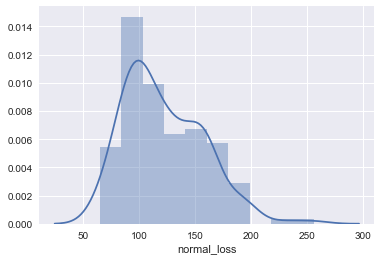

In [35]:
sns.distplot(data_2['normal_loss'])
plt.show()

In [36]:
print (len(data_2['normal_loss'].unique()))
print (data_2.shape[0])

51
164


#### Although this is the regression task, the output value is not exactly continuous. 1 out of 3 rows has the 'same target value'.

#### I will find the missing values in each column and impute them.

In [37]:
data_2.isnull().any()

normal_loss        False
make               False
fuel               False
asp                False
doors              False
body               False
drive_wheels       False
engine_location    False
wheel_base         False
length             False
width              False
height             False
weight             False
engine_type        False
cyl                False
engine_size        False
fuel_sys           False
bore                True
stroke              True
compression        False
horsepower         False
peak_rpm           False
mpg_city           False
mpg_highway        False
price              False
dtype: bool

In [38]:
# Bore and Stroke columns have 4 missing values
print (len(data_2[data_2['bore'].isnull() == True]))
print (len(data_2[data_2['stroke'].isnull() == True]))

4
4


In [39]:
# Both colums have missing values at the same indexes
print (np.where(data_2['bore'].isnull())[0])
print (np.where(data_2['stroke'].isnull())[0])

[39 40 41 42]
[39 40 41 42]


In [40]:
# Indeed, they seem to be the same model
data_2.iloc[[39, 40, 41, 42], :]

,normal_loss,make,fuel,asp,doors,body,drive_wheels,engine_location,wheel_base,length,...,engine_size,fuel_sys,bore,stroke,compression,horsepower,peak_rpm,mpg_city,mpg_highway,price
39,150,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,...,70,4bbl,NaN,NaN,9.4,101,6000,17,23,10945
40,150,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,...,70,4bbl,NaN,NaN,9.4,101,6000,17,23,11845
41,150,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,...,70,4bbl,NaN,NaN,9.4,101,6000,17,23,13645
42,150,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,...,80,mpfi,NaN,NaN,9.4,135,6000,16,23,15645


#### First option: Impute with the values of the identical 'make' and 'body'

In [41]:
# Looking at the mpg, horspower, engine size data, however, rwd and fwd may have very different specifications.
# Also, there are no other samples with 'rwd' and 'mazda' we can reference. 
data_2[(data_2.make == 'mazda') & (data_2.body == 'hatchback')]

,normal_loss,make,fuel,asp,doors,body,drive_wheels,engine_location,wheel_base,length,...,engine_size,fuel_sys,bore,stroke,compression,horsepower,peak_rpm,mpg_city,mpg_highway,price
34,104,mazda,gas,std,two,hatchback,fwd,front,93.1,159.1,...,91,2bbl,3.03,3.15,9.0,68,5000,30,31,5195
35,104,mazda,gas,std,two,hatchback,fwd,front,93.1,159.1,...,91,2bbl,3.03,3.15,9.0,68,5000,31,38,6095
36,104,mazda,gas,std,two,hatchback,fwd,front,93.1,159.1,...,91,2bbl,3.03,3.15,9.0,68,5000,31,38,6795
39,150,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,...,70,4bbl,NaN,NaN,9.4,101,6000,17,23,10945
40,150,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,...,70,4bbl,NaN,NaN,9.4,101,6000,17,23,11845
41,150,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,...,70,4bbl,NaN,NaN,9.4,101,6000,17,23,13645
42,150,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,...,80,mpfi,NaN,NaN,9.4,135,6000,16,23,15645
43,129,mazda,gas,std,two,hatchback,fwd,front,98.8,177.8,...,122,2bbl,3.39,3.39,8.6,84,4800,26,32,8845
45,129,mazda,gas,std,two,hatchback,fwd,front,98.8,177.8,...,122,2bbl,3.39,3.39,8.6,84,4800,26,32,10595
47,115,mazda,gas,std,four,hatchback,fwd,front,98.8,177.8,...,122,2bbl,3.39,3.39,8.6,84,4800,26,32,11245


#### Second option: Impute with the values of similar qualitative characteristics. 

In [42]:
data_2.loc[[39,40,41,42], col_cat]

,make,fuel,asp,doors,body,drive_wheels,engine_location,engine_type,cyl,fuel_sys
39,mazda,gas,std,two,hatchback,rwd,front,rotor,two,4bbl
40,mazda,gas,std,two,hatchback,rwd,front,rotor,two,4bbl
41,mazda,gas,std,two,hatchback,rwd,front,rotor,two,4bbl
42,mazda,gas,std,two,hatchback,rwd,front,rotor,two,mpfi


In [43]:
# Using the qualitative characteristics of missing data point, I will select similar few.
grouped_cat_value = data_2[(data_2.fuel == 'gas') & (data_2.asp == 'std') & (data_2.doors == 'two') & 
      (data_2.body == 'hatchback') & (data_2.drive_wheels == 'rwd') ]
grouped_cat_value

,normal_loss,make,fuel,asp,doors,body,drive_wheels,engine_location,wheel_base,length,...,engine_size,fuel_sys,bore,stroke,compression,horsepower,peak_rpm,mpg_city,mpg_highway,price
39,150,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,...,70,4bbl,NaN,NaN,9.4,101,6000,17,23,10945
40,150,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,...,70,4bbl,NaN,NaN,9.4,101,6000,17,23,11845
41,150,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,...,70,4bbl,NaN,NaN,9.4,101,6000,17,23,13645
42,150,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,...,80,mpfi,NaN,NaN,9.4,135,6000,16,23,15645
79,194,nissan,gas,std,two,hatchback,rwd,front,91.3,170.7,...,181,mpfi,3.43,3.27,9.0,160,5200,19,25,17199
81,231,nissan,gas,std,two,hatchback,rwd,front,99.2,178.5,...,181,mpfi,3.43,3.27,9.0,160,5200,19,25,18399
95,186,porsche,gas,std,two,hatchback,rwd,front,94.5,168.9,...,151,mpfi,3.94,3.11,9.5,143,5500,19,27,22018
128,168,toyota,gas,std,two,hatchback,rwd,front,94.5,168.7,...,98,2bbl,3.19,3.03,9.0,70,4800,29,34,8238
130,168,toyota,gas,std,two,hatchback,rwd,front,94.5,168.7,...,98,mpfi,3.24,3.08,9.4,112,6600,26,29,9538
133,134,toyota,gas,std,two,hatchback,rwd,front,98.4,176.2,...,146,mpfi,3.62,3.50,9.3,116,4800,24,30,9989


In [44]:
# Checking out the standard deviation of bore, stroke values thoughout the data will be helpful.
grouped_cat_value[['bore', 'stroke']].describe()

,bore,stroke
count,9.000000,9.000000
mean,3.445556,3.273333
std,0.243676,0.172409
min,3.190000,3.030000
25%,3.270000,3.110000
50%,3.430000,3.270000
75%,3.620000,3.350000
max,3.940000,3.500000


#### Thrid option: Impute with the values of similar quantitative characteristics that are highly related to 'bore' and 'stroke'.

In [45]:
# First, look at the correlation of 'bore' and other numeric variables
for col in col_num:
    print (col,  data_2.bore.corr(data_2[col]).round(4))

normal_loss -0.0362
wheel_base 0.5805
length 0.6491
width 0.575
height 0.2615
weight 0.6466
engine_size 0.5973
bore 1.0
stroke -0.1055
compression 0.0192
horsepower 0.5571
peak_rpm -0.3158
mpg_city -0.5856
mpg_highway -0.5867
price 0.5349


In [46]:
for col in col_num:
    print (col,  data_2.stroke.corr(data_2[col]).round(4))

normal_loss 0.0656
wheel_base 0.164
length 0.116
width 0.1929
height -0.0954
weight 0.1717
engine_size 0.2967
bore -0.1055
stroke 1.0
compression 0.2409
horsepower 0.1493
peak_rpm -0.0086
mpg_city -0.0214
mpg_highway -0.014
price 0.1588


#### I will use "wheel_base, length, width, weight, engine_size, horsepower, mpg_city, mpg_highway, price " to create clusters of the datapoints;  I can then impute with the mean value of bore & stroke of the same cluster.

In [47]:
# The cluster method I am going to use is sensitive to the scale, and therefore, will scale the matrix first. 
from sklearn.preprocessing import RobustScaler
ro_scaler = RobustScaler()

In [48]:
data_2_a = ro_scaler.fit_transform(data_2[['wheel_base', 'length', 'weight', 'engine_size', 'horsepower',
                                         'mpg_city', 'mpg_highway', 'price']])
data_2_a = pd.DataFrame(data_2_a, columns = ['wheel_base', 'length', 'weight', 'engine_size', 'horsepower',
                                         'mpg_city', 'mpg_highway', 'price'])

In [49]:
data_2_a.reset_index()
data_2_a.head()

,wheel_base,length,weight,engine_size,horsepower,mpg_city,mpg_highway,price
0,0.550847,0.379381,-0.043901,0.000000,0.244444,-0.222222,-0.222222,0.658138
1,0.483051,0.379381,0.657071,0.776978,0.533333,-0.888889,-1.111111,1.150177
2,1.567797,1.707216,0.685858,0.776978,0.422222,-0.777778,-0.777778,1.186729
3,1.567797,1.707216,1.034185,0.633094,1.088889,-1.000000,-1.333333,2.053421
4,0.788136,0.395876,0.039583,-0.028777,0.222222,-0.333333,-0.333333,1.006783


In [50]:
from scipy.cluster.hierarchy import dendrogram, linkage

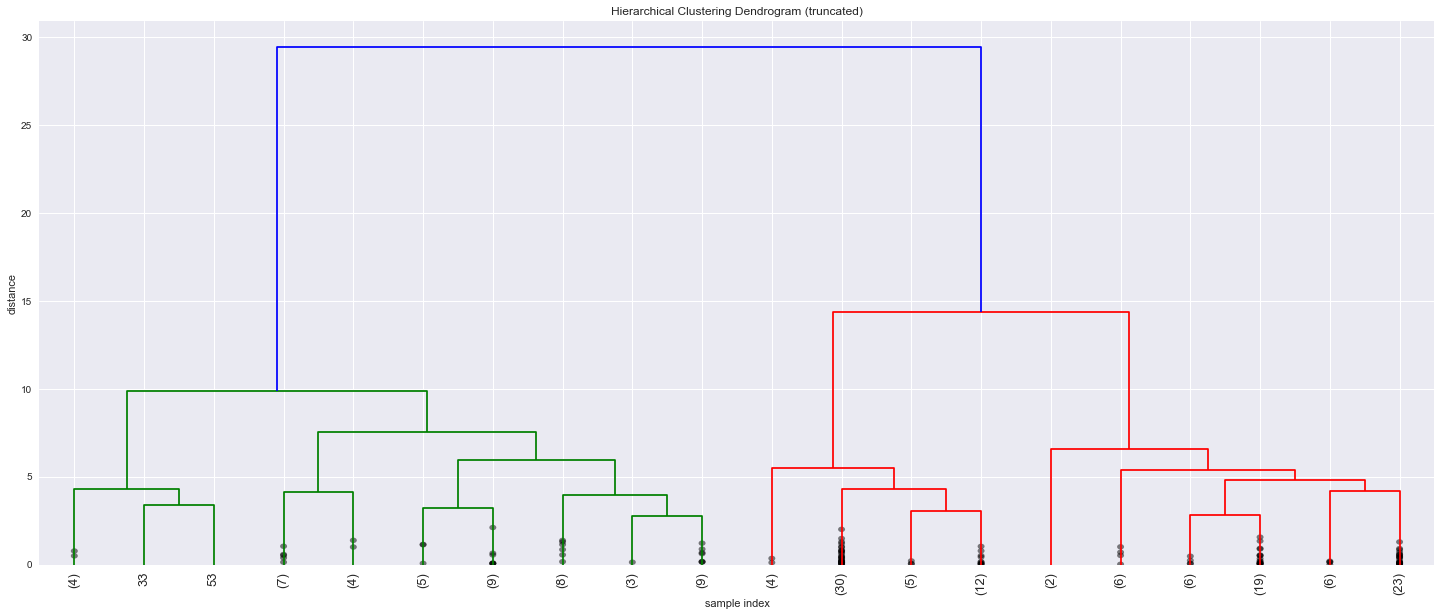

In [51]:
Z = linkage(data_2_a, 'ward')
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=20,  # show only the last pa merged clusters
    leaf_rotation=90.,
    leaf_font_size=13.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

#### From below, I can verify that the data points with missing value are grouped in a same cluster

In [52]:
from scipy.cluster.hierarchy import fcluster
max_d = 7
clusters = fcluster(Z, max_d, criterion='maxclust')
clusters[39:43]

array([5, 5, 5, 5], dtype=int32)

In [53]:
# There are 51 datapoints with same cluster
data_2_a = data_2_a.assign(h_cluster = clusters)
data_2_a.reset_index(inplace = True, drop = True)
data_2_a.h_cluster.value_counts()

7    60
5    51
4    20
3    14
2    11
1     6
6     2
Name: h_cluster, dtype: int64

In [54]:
# Let's check which cars are inlcuded.
inpute_ref = data_2_a[data_2_a['h_cluster'] == 5].index
data_2.iloc[inpute_ref, :][:10]

,normal_loss,make,fuel,asp,doors,body,drive_wheels,engine_location,wheel_base,length,...,engine_size,fuel_sys,bore,stroke,compression,horsepower,peak_rpm,mpg_city,mpg_highway,price
18,110,dodge,gas,std,four,wagon,fwd,front,103.3,174.6,...,122,2bbl,3.34,3.46,8.5,88,5000,24,30,8921
27,106,honda,gas,std,two,hatchback,fwd,front,96.5,167.5,...,110,1bbl,3.15,3.58,9.0,86,5800,27,33,7895
28,106,honda,gas,std,two,hatchback,fwd,front,96.5,167.5,...,110,1bbl,3.15,3.58,9.0,86,5800,27,33,9095
29,85,honda,gas,std,four,sedan,fwd,front,96.5,175.4,...,110,1bbl,3.15,3.58,9.0,86,5800,27,33,8845
30,85,honda,gas,std,four,sedan,fwd,front,96.5,175.4,...,110,1bbl,3.15,3.58,9.0,86,5800,27,33,10295
31,85,honda,gas,std,four,sedan,fwd,front,96.5,175.4,...,110,mpfi,3.15,3.58,9.0,101,5800,24,28,12945
32,107,honda,gas,std,two,sedan,fwd,front,96.5,169.1,...,110,2bbl,3.15,3.58,9.1,100,5500,25,31,10345
39,150,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,...,70,4bbl,NaN,NaN,9.4,101,6000,17,23,10945
40,150,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,...,70,4bbl,NaN,NaN,9.4,101,6000,17,23,11845
41,150,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,...,70,4bbl,NaN,NaN,9.4,101,6000,17,23,13645


In [55]:
# Comapre the std with other options
data_2.loc[inpute_ref, ['bore', 'stroke']].describe()

,bore,stroke
count,47.000000,47.000000
mean,3.357660,3.305745
std,0.183329,0.326688
min,3.050000,2.640000
25%,3.190000,3.370000
50%,3.330000,3.460000
75%,3.620000,3.500000
max,3.620000,3.580000


#### I do not have much domain knowledge about bore and stroke. At this point, I will chosee the mean value with lower std.



In [56]:
data_2.iloc[[39, 40, 41, 42], 17] = data_2.iloc[inpute_ref, 17].mean() # From cluster
data_2.iloc[[39, 40, 41, 42], 18] = grouped_cat_value['stroke'].mean() # From qualitative similarity

In [57]:
# No more NaN values in the dataset
data_2.isnull().values.any()

False

#### There are also rows with "?" values instead of NaN. I will impute them as well.

In [58]:
np.where(data_2.values == '?')

(array([17]), array([4]))

In [59]:
data_2.iloc[17, :]

normal_loss          148
make               dodge
fuel                 gas
asp                turbo
doors                  ?
body               sedan
drive_wheels         fwd
engine_location    front
wheel_base          93.7
length             157.3
width               63.8
height              50.6
weight              2191
engine_type          ohc
cyl                 four
engine_size           98
fuel_sys            mpfi
bore                3.03
stroke              3.39
compression          7.6
horsepower           102
peak_rpm            5500
mpg_city              24
mpg_highway           30
price               8558
Name: 17, dtype: object

In [60]:
data_2[(data_2.make == 'dodge')]

,normal_loss,make,fuel,asp,doors,body,drive_wheels,engine_location,wheel_base,length,...,engine_size,fuel_sys,bore,stroke,compression,horsepower,peak_rpm,mpg_city,mpg_highway,price
11,118,dodge,gas,std,two,hatchback,fwd,front,93.7,157.3,...,90,2bbl,2.97,3.23,9.41,68,5500,37,41,5572
12,118,dodge,gas,std,two,hatchback,fwd,front,93.7,157.3,...,90,2bbl,2.97,3.23,9.40,68,5500,31,38,6377
13,118,dodge,gas,turbo,two,hatchback,fwd,front,93.7,157.3,...,98,mpfi,3.03,3.39,7.60,102,5500,24,30,7957
14,148,dodge,gas,std,four,hatchback,fwd,front,93.7,157.3,...,90,2bbl,2.97,3.23,9.40,68,5500,31,38,6229
15,148,dodge,gas,std,four,sedan,fwd,front,93.7,157.3,...,90,2bbl,2.97,3.23,9.40,68,5500,31,38,6692
16,148,dodge,gas,std,four,sedan,fwd,front,93.7,157.3,...,90,2bbl,2.97,3.23,9.40,68,5500,31,38,7609
17,148,dodge,gas,turbo,?,sedan,fwd,front,93.7,157.3,...,98,mpfi,3.03,3.39,7.60,102,5500,24,30,8558
18,110,dodge,gas,std,four,wagon,fwd,front,103.3,174.6,...,122,2bbl,3.34,3.46,8.50,88,5000,24,30,8921
19,145,dodge,gas,turbo,two,hatchback,fwd,front,95.9,173.2,...,156,mfi,3.60,3.90,7.00,145,5000,19,24,12964


In [61]:
# It's a sedan. So I will impute with 'four'
data_2.iloc[17, 4] = 'four'

#### Pre-processing is done

# Quick Benchmark before EDA & Feature Engineering

#### Normally, EDA is done before the prediction.  However, I would like to try quick prediction with current dataset because it helps me on benchmarking and feature selection.

In [62]:
# I will use RandomForest because it can provide acceptable results without feature scaling with few hyperparmeters.
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [63]:
data_quick_test = pd.get_dummies(data_2, columns= col_cat)

In [64]:
X_train, X_test, y_train, y_test = train_test_split(data_quick_test.iloc[:,1:], data_quick_test['normal_loss'],
                                                   random_state = 1)

In [65]:
forest = RandomForestRegressor(random_state=1)
forest.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=1,
           verbose=0, warm_start=False)

In [66]:
# The prediction of simple RF is not terrible. My goal of the prediction therefore will be having lower mse. 
pred = forest.predict(X_test)
print ("MSE: ", mean_squared_error(y_test, pred))
print ("R2: ", r2_score(y_test, pred).round(3))

MSE:  300.923902439
R2:  0.679


In [67]:
# Since visualizing feature importane will be often used, I will define a function
def plot_feature_importance(X_train, model):
    plt.figure(figsize=(25, 15))
    n_features = X_train.shape[1]
    plt.barh(range(n_features), model.feature_importances_)
    plt.yticks(np.arange(n_features), X_train.columns, fontsize = 14)
    plt.xlabel("Feature Importance")
    plt.ylabel("Features")

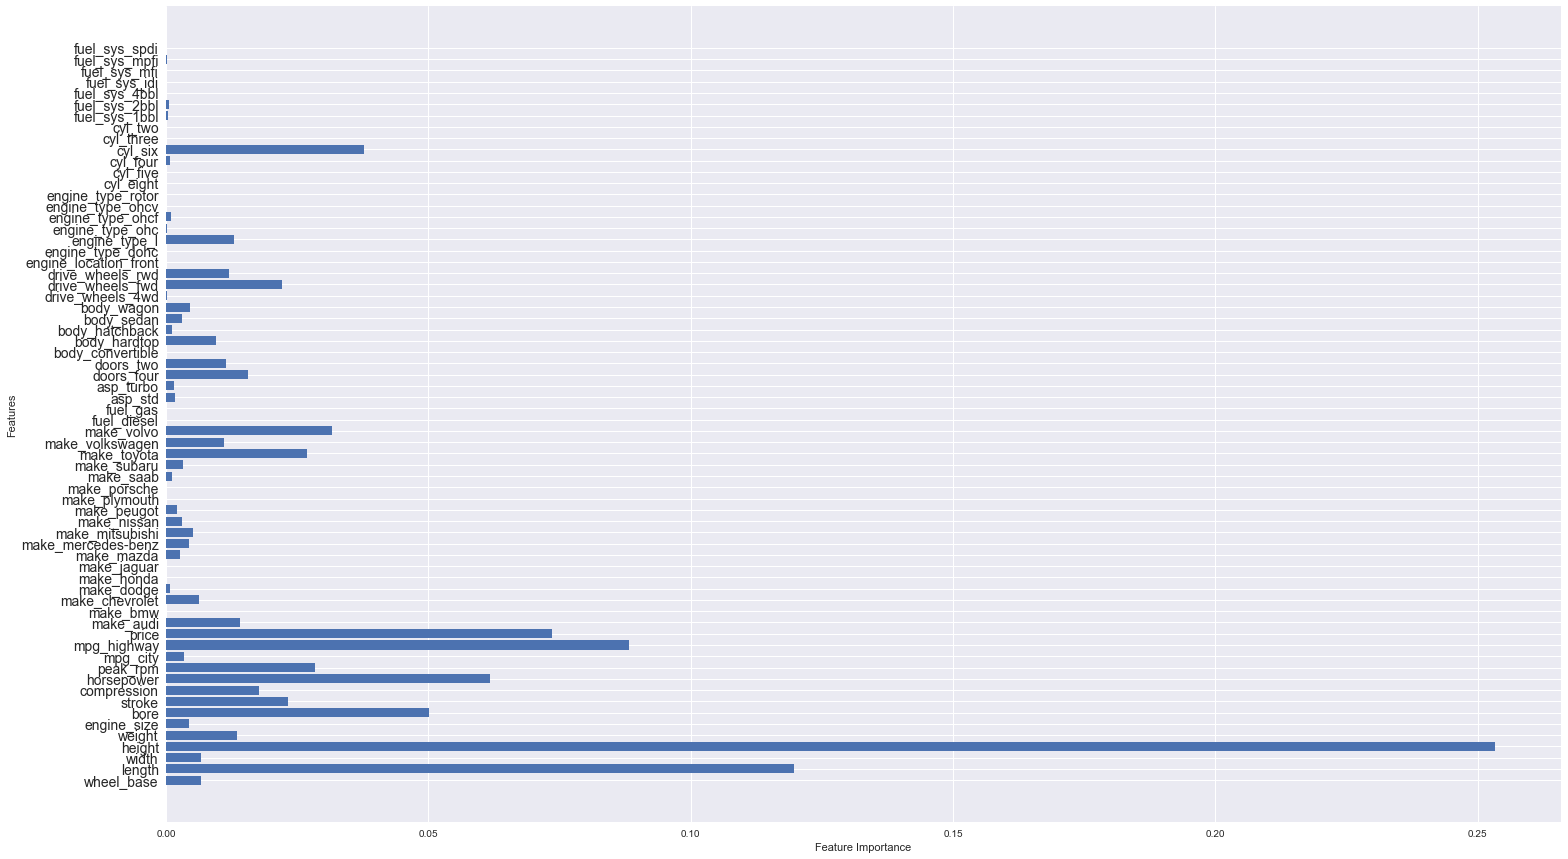

In [68]:
# Throughout the feature selection and engineering, I can use this just a reference.
plot_feature_importance(X_train, forest)

# EDA and Feature Selection & Engineering

### A. Numerical Variables

#### Big picture of the relationship between each numeric variable and target

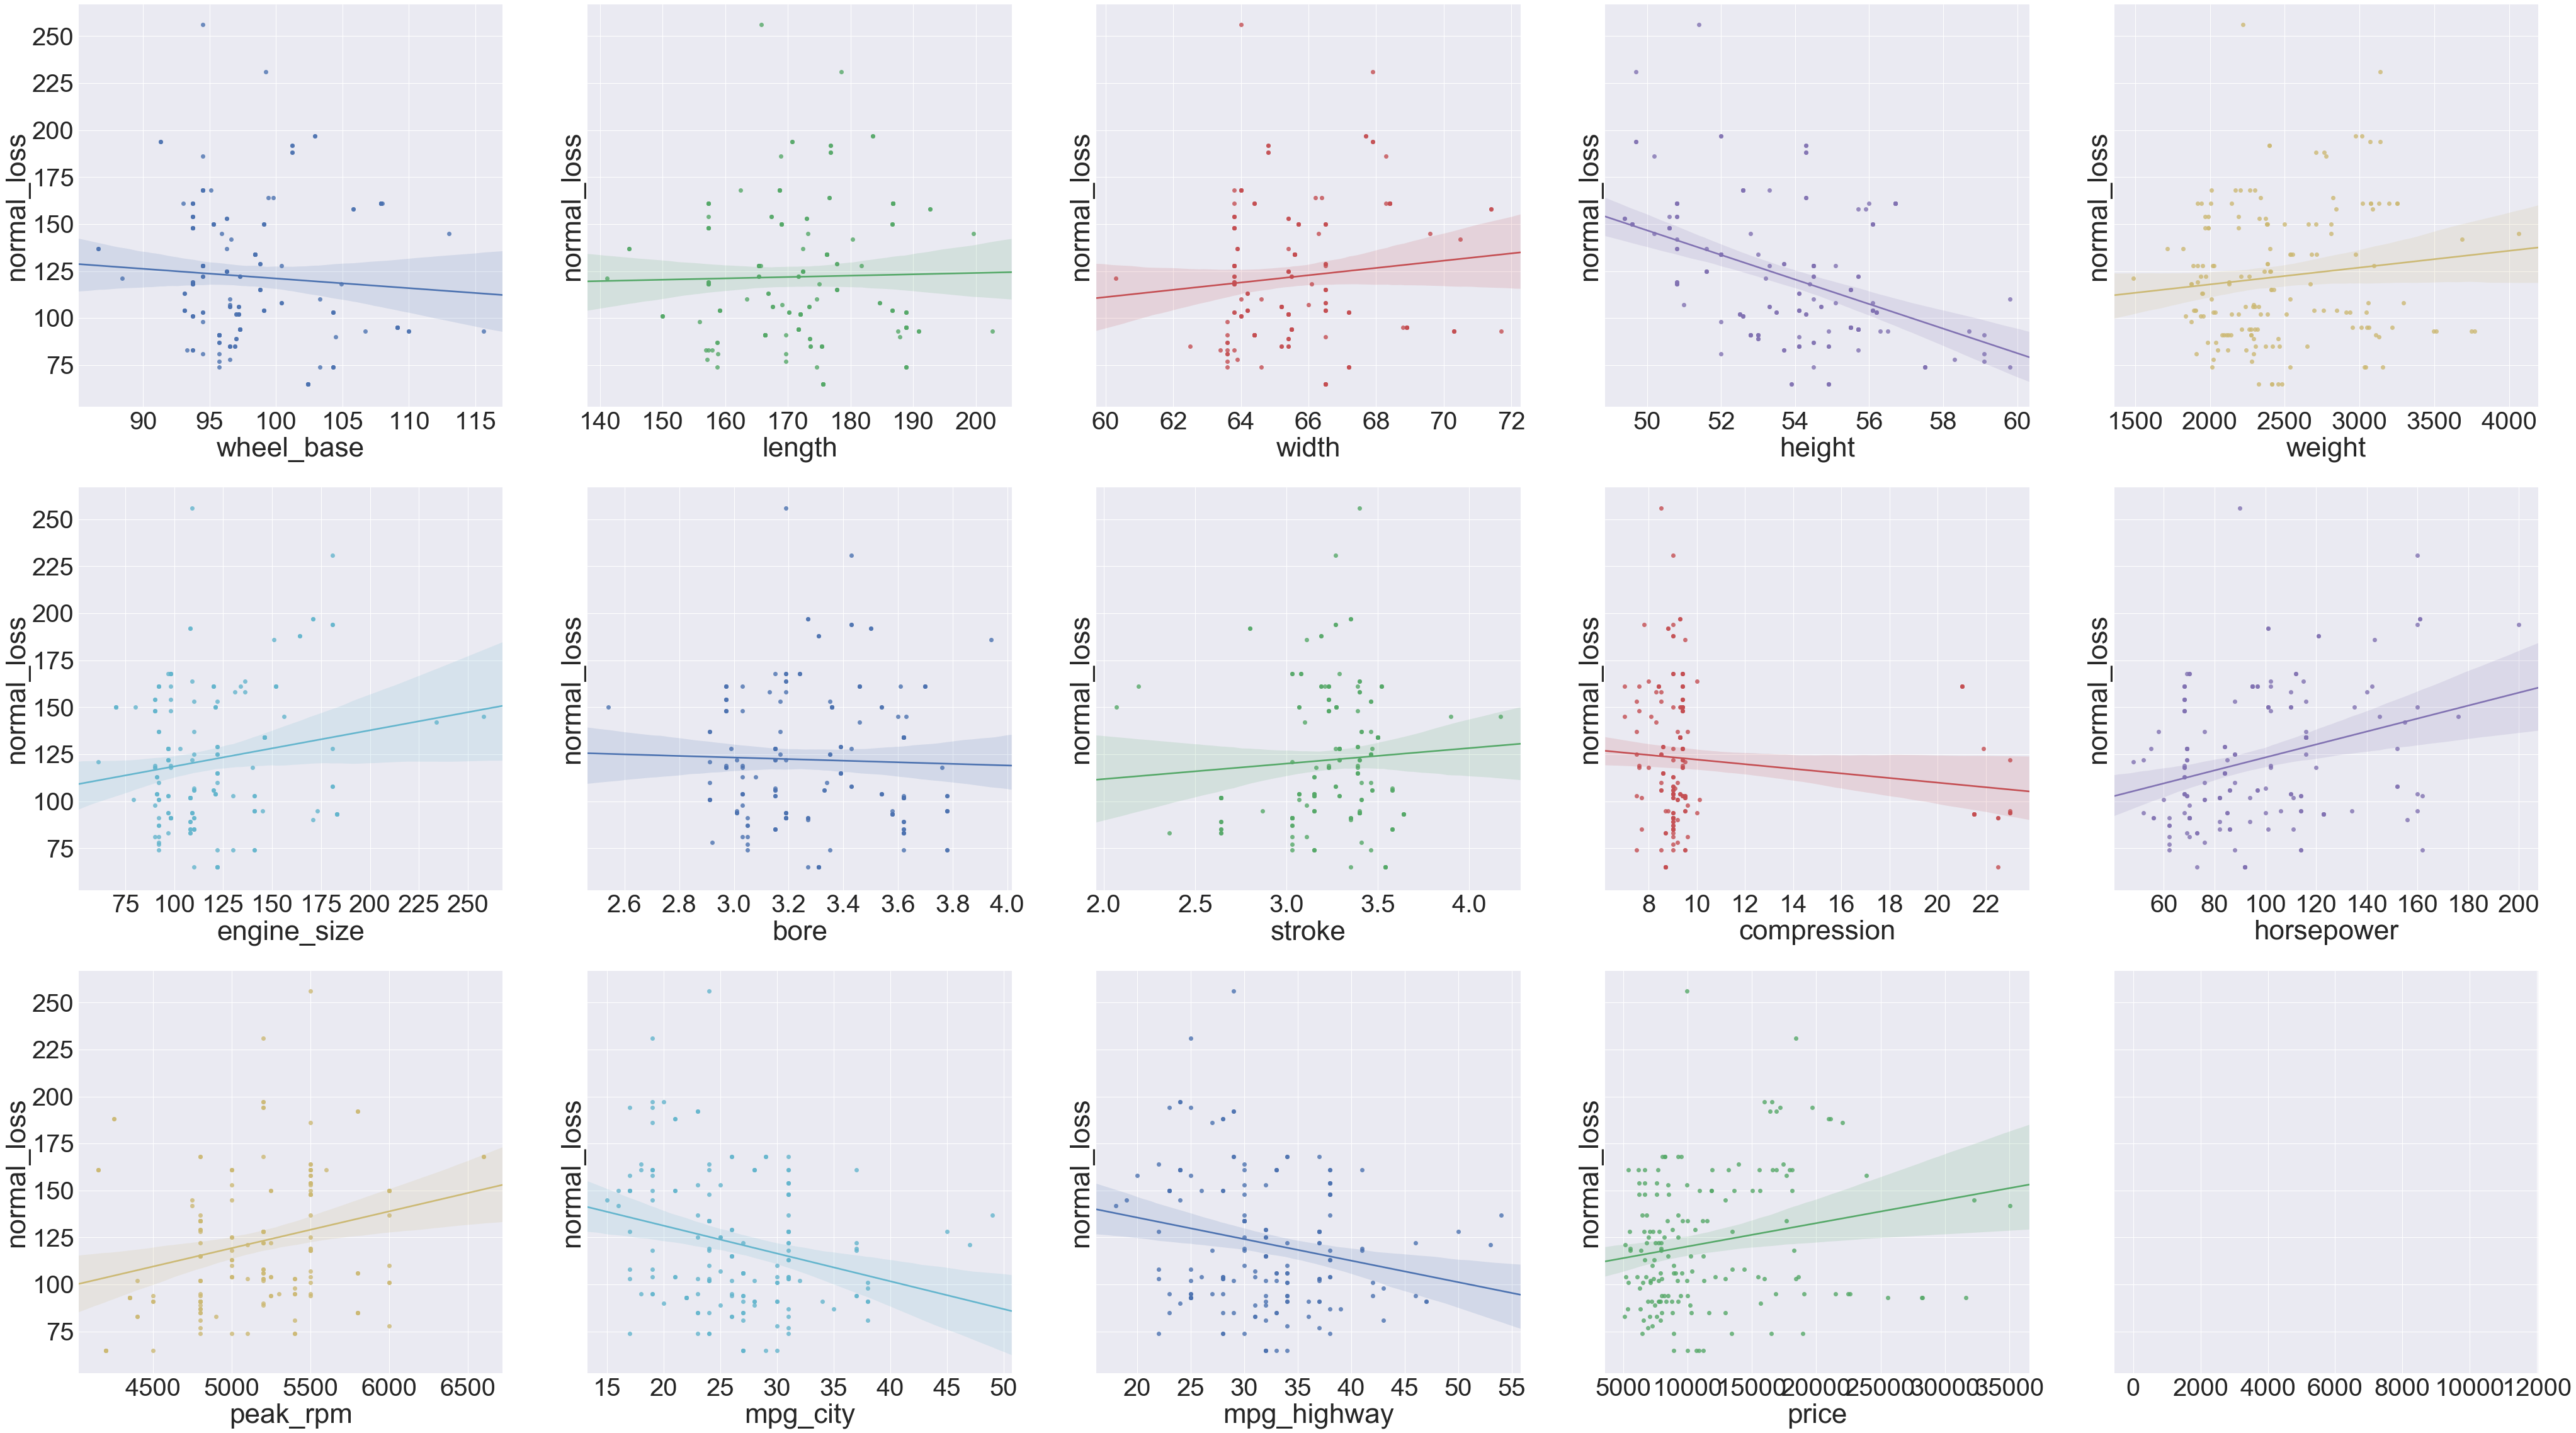

In [69]:
plt.clf()
with plt.style.context("seaborn-dark"):
    sns.set(font_scale=4)
    f, axes = plt.subplots(3, 5, figsize =(70, 40), sharey=True)
    for num, ax in zip(range(0,14), axes.flat):
        sns.regplot(x = data_2[col_num].iloc[:,num+1], y = data_2[col_num].iloc[:,0],
                   ax = ax)

In [70]:
# Looking at the corelation
import operator
corr_list = {}
for col in col_num:
    corr_list[col] =  data_2['normal_loss'].corr(data_2[col])
    corr_abs = [abs(i) for i in corr_list.values()]
print (sum(corr_abs[1:]) / len(col_num))
sorted(corr_list.items(), key=operator.itemgetter(1))

0.159120588169


[('height', -0.43233484165214997),
 ('mpg_city', -0.2585023178401647),
 ('mpg_highway', -0.21076757918668154),
 ('compression', -0.13265397570189458),
 ('wheel_base', -0.074361659680663841),
 ('bore', -0.031514723473329884),
 ('length', 0.023219548799264307),
 ('stroke', 0.06750066236737913),
 ('width', 0.10507250348703735),
 ('weight', 0.11989268503424513),
 ('engine_size', 0.167364972271944),
 ('price', 0.20325417074184232),
 ('peak_rpm', 0.26459721284190835),
 ('horsepower', 0.29577196945041317),
 ('normal_loss', 1.0)]

In [71]:
# The data seems to have few outliers (Two very high target values at the top of the graph)
data_2.normal_loss.sort_values(ascending = False)[:7]

152    256
81     231
143    197
142    197
80     194
79     194
5      192
Name: normal_loss, dtype: int64

In [72]:
# Having a closer look of data with extremely high target value
data_2.iloc[[152, 81], :]

,normal_loss,make,fuel,asp,doors,body,drive_wheels,engine_location,wheel_base,length,...,engine_size,fuel_sys,bore,stroke,compression,horsepower,peak_rpm,mpg_city,mpg_highway,price
152,256,volkswagen,gas,std,two,hatchback,fwd,front,94.5,165.7,...,109,mpfi,3.19,3.40,8.5,90,5500,24,29,9980
81,231,nissan,gas,std,two,hatchback,rwd,front,99.2,178.5,...,181,mpfi,3.43,3.27,9.0,160,5200,19,25,18399


#### I will check create a separate DataFrame with removing outliers and see how it is different from the original

In [73]:
data_2_b = data_2.drop([152, 81])
data_2_b.reset_index(drop = True, inplace = True)
data_2_b.shape

(162, 25)

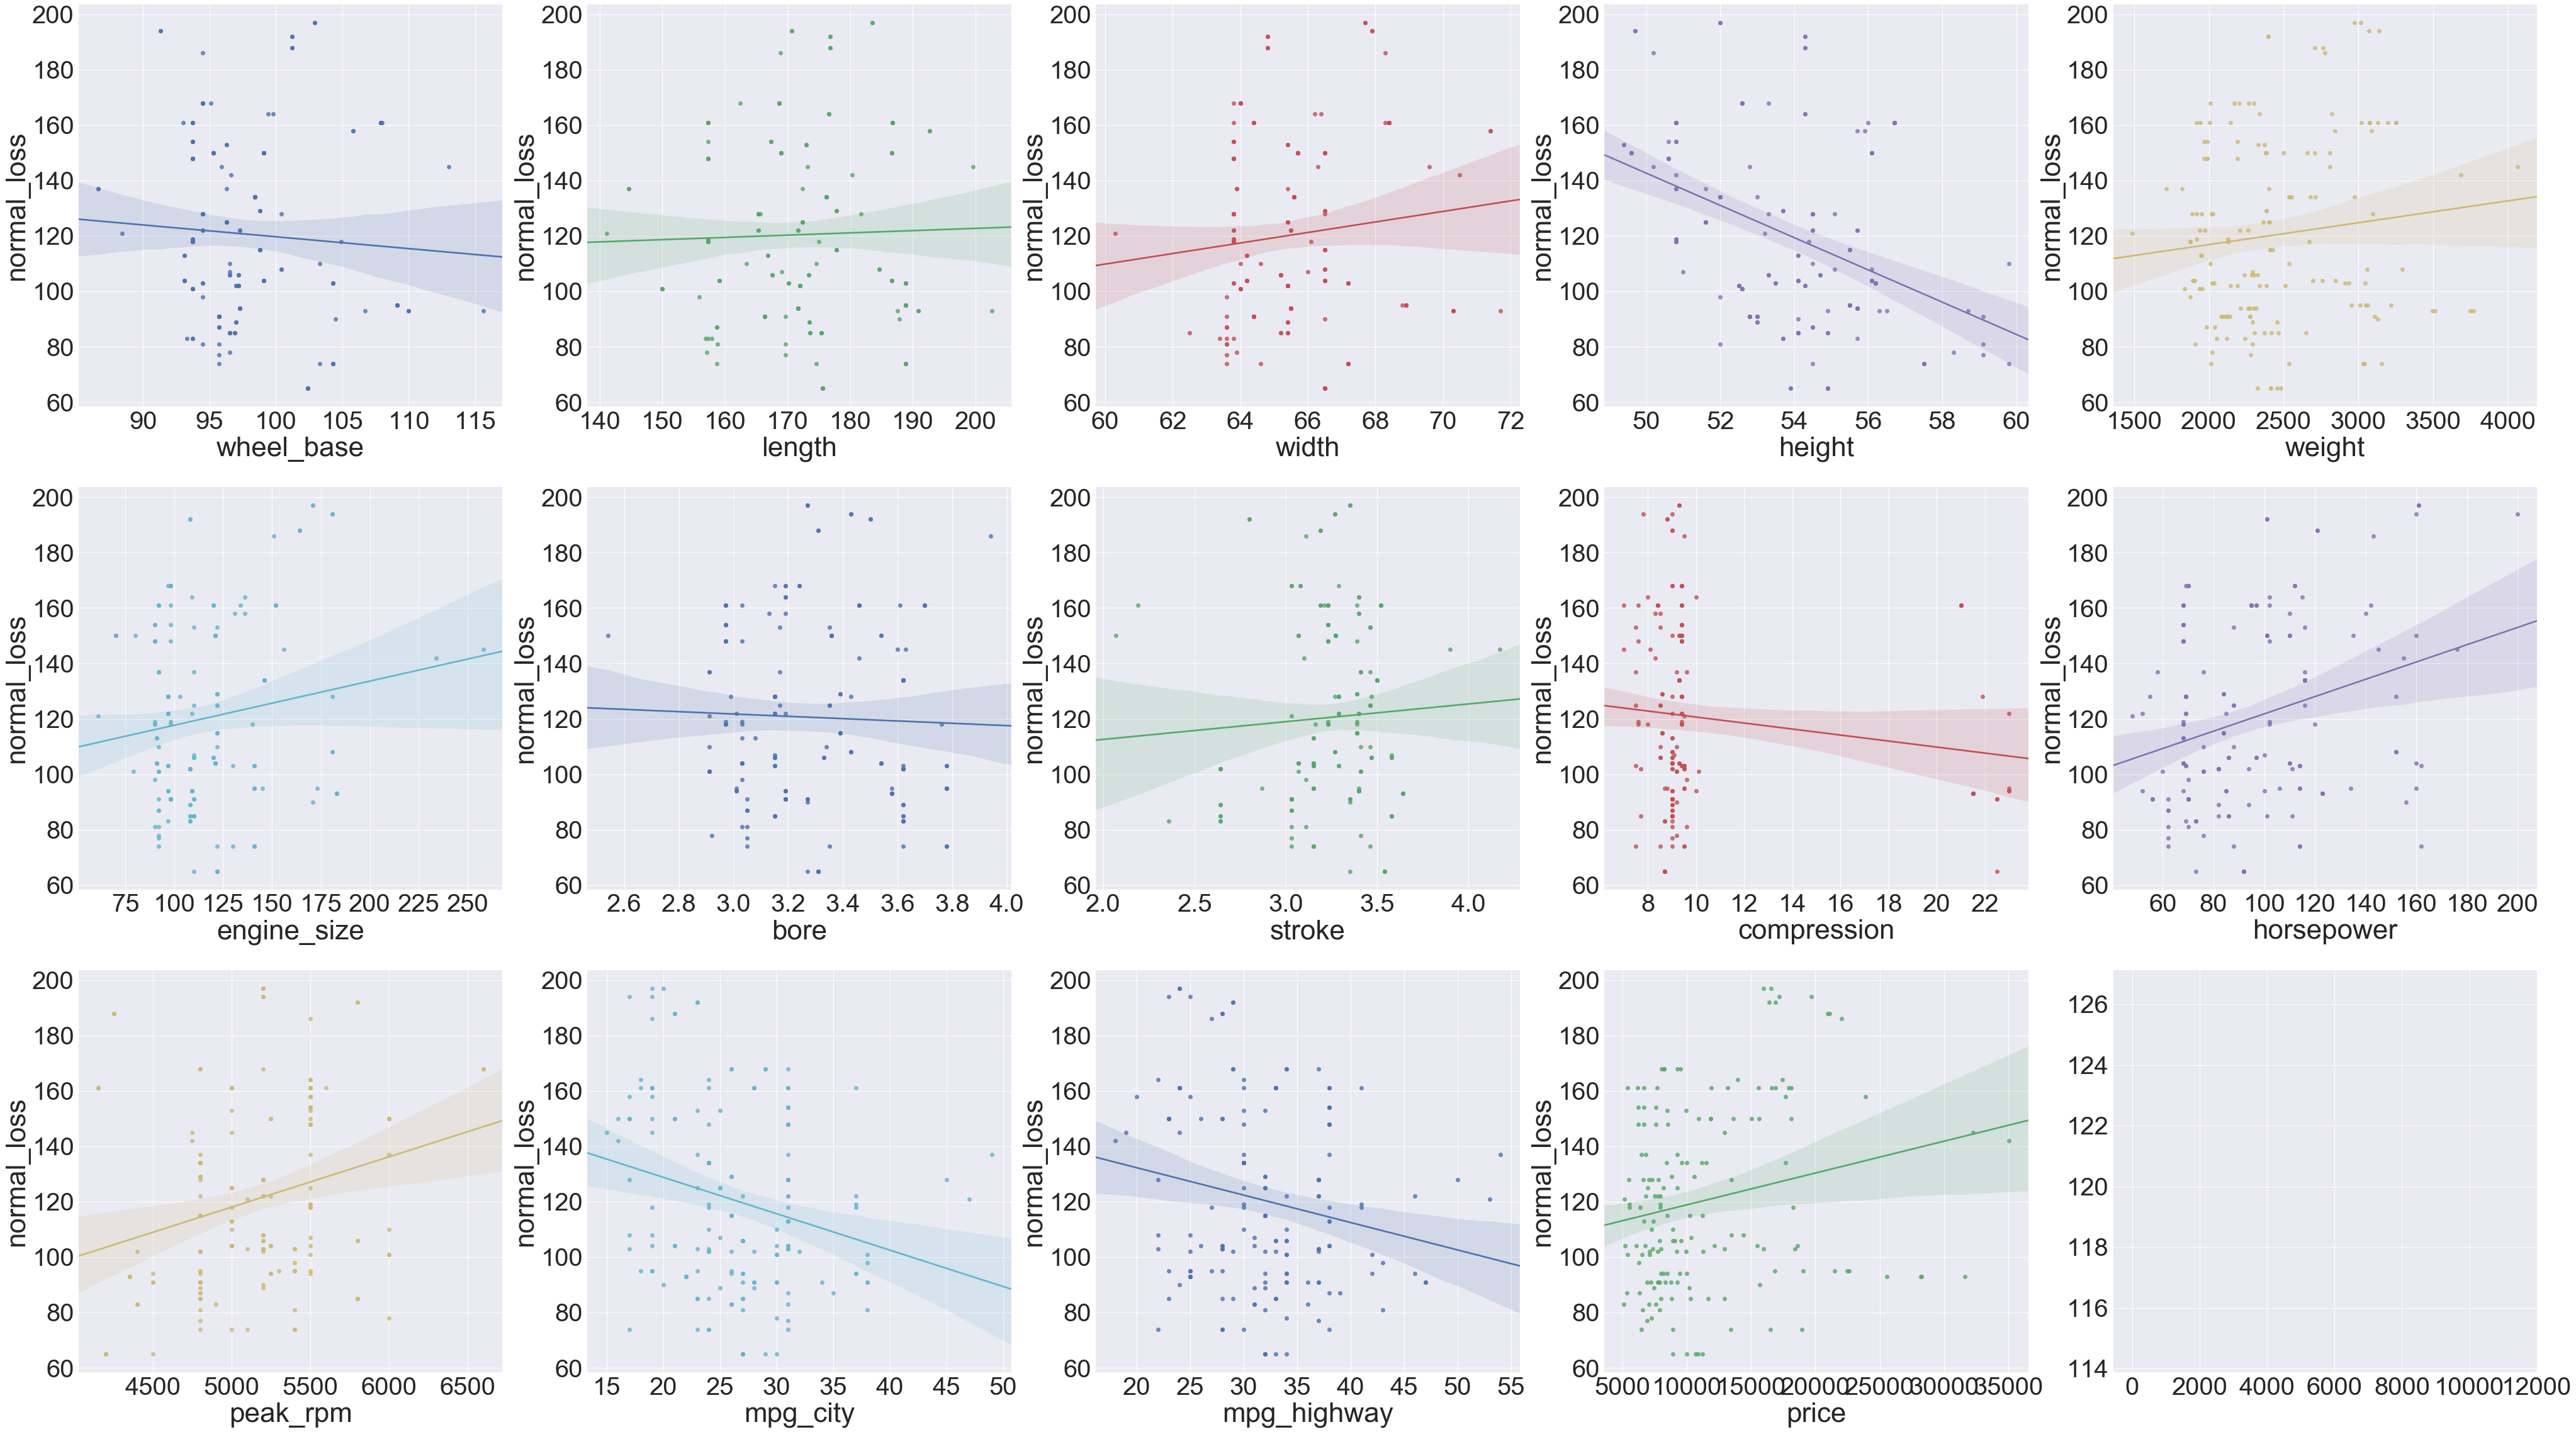

In [74]:
plt.clf()
with plt.style.context("seaborn-dark"):
    sns.set(font_scale=4)
    f, axes = plt.subplots(3, 5, figsize =(70, 40))
    for num, ax in zip(range(0,14), axes.flat):
        sns.regplot(x = data_2_b[col_num].iloc[:,num+1], y = data_2_b[col_num].iloc[:,0],
                   ax = ax)

In [75]:
corr_list = {}
for col in col_num:
    corr_list[col] =  data_2_b['normal_loss'].corr(data_2_b[col])
    corr_abs = [abs(i) for i in corr_list.values()]
print (sum(corr_abs[1:]) / len(col_num))
sorted(corr_list.items(), key=operator.itemgetter(1))

0.152986943055


[('height', -0.4117063925070189),
 ('mpg_city', -0.24751990025109982),
 ('mpg_highway', -0.19618427499898461),
 ('compression', -0.126918662956089),
 ('wheel_base', -0.066664920525202856),
 ('bore', -0.033812978006755527),
 ('length', 0.028389242250815329),
 ('stroke', 0.056753521679099993),
 ('width', 0.11085422457689838),
 ('weight', 0.11366297142633251),
 ('engine_size', 0.14831497403912411),
 ('price', 0.20283177425454657),
 ('peak_rpm', 0.26518026323724725),
 ('horsepower', 0.28601004511988842),
 ('normal_loss', 0.99999999999999978)]

#### Removing suspected outliers did not make significant improvement in overall correlation.  Considering the small data size I have, I will keep the original data set for the  further analysis

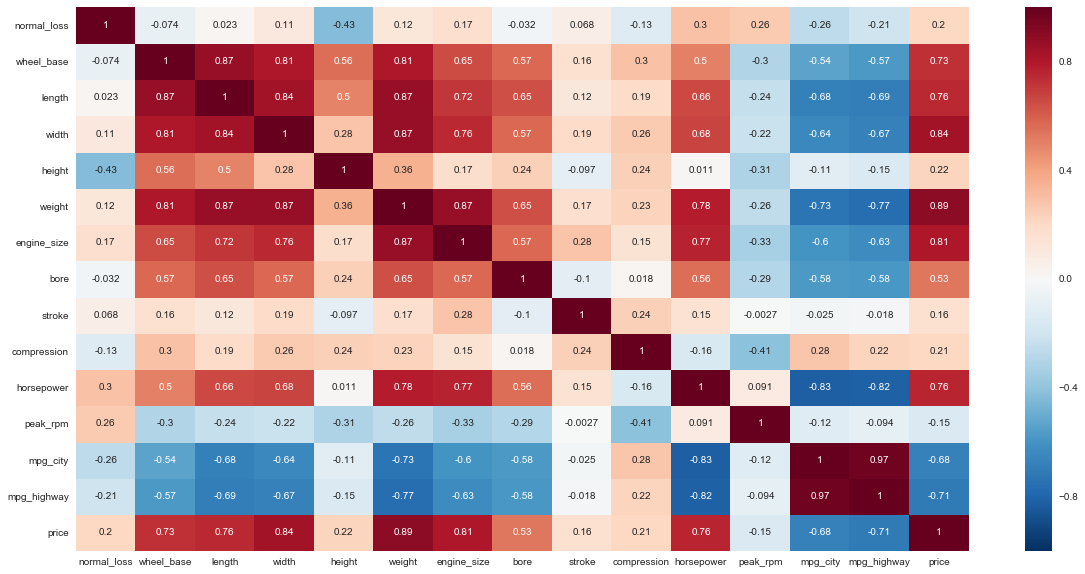

In [76]:
plt.clf()
corr = data_2[col_num].corr()
plt.figure(figsize = (20, 10))
sns.heatmap(corr, annot = True)

#### The heatmap shows that many independent variables are corelated each other, which may create multicolinearity.

In [77]:
# Calculate VIF to evaluate the significance of multicolinearity
from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

/Users/aceit/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [78]:
features = "+".join(col_num[1:])
y, X = dmatrices('normal_loss~' + features, data_2, return_type='dataframe')

vif = pd.DataFrame()
vif["VIF_Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

vif.round(2)

,VIF_Factor,features
0,6896.58,Intercept
1,6.39,wheel_base
2,8.42,length
3,6.16,width
4,2.25,height
5,17.27,weight
6,7.36,engine_size
7,2.29,bore
8,1.46,stroke
9,2.46,compression


#### VIF Analysis shows the risk of multicolinearity. Now I have two chocies.
* One, Replace redundant features with new features calculated by arithmetic
* Two, Use PCA to come up with principle components that are not correlated

### Option - 1) Create new features with arithmetic

#### Reference for the terminology
* Bore: Diameter of cylinder
* Stroke: Length it travels from bottom to up
* Therefore, total displacement of 1 cylinder will be pi * (bore/2)**2 * stroke
* Engines with the bore bigger than stroke (like your example) are called oversquare 
* Engines with the bore smaller than stroke are called undersquare engines
* https://mechanics.stackexchange.com/questions/24969/what-is-meant-by-bore-and-stroke

In [79]:
data_2 = data_2[[i for i in col_num+col_cat]]
# Leave Numeric variables as it is, and add modified category features 
data_3_a = data_2[col_num].copy()
# Arithmetic feature engineering for Numeric, then add modified category features
data_3_b = data_2[col_num].copy()
# PCA for Numeric, then add modified category features
data_3_c = data_2[col_num].copy()

#### I will create new features that may better represent the characteristic of the car

In [80]:
# Area may reduce the colinearity between length and width
data_3_b = data_3_b.assign(area = lambda x: x.length * x.width)
# Volume can provide overall shape of the car
data_3_b = data_3_b.assign(volume = lambda x: x.length * x.width * x.height)
# height/length ratio may provide information about car type such as sportscar or truck
data_3_b = data_3_b.assign(h_l_ratio = lambda x: x.height / x.length)
# similar as above
data_3_b = data_3_b.assign(l_wb_ratio = lambda x: x.length / x.wheel_base)
# cars with low vol_per_engine may be speed oriented
data_3_b = data_3_b.assign(vol_per_engine = lambda x: x.volume / x.engine_size)
# Shows characteristics of the engine
data_3_b= data_3_b.assign(engine_size_compression_ratio = lambda x: x.engine_size / x.compression)
data_3_b= data_3_b.assign(dim_hp_ratio = lambda x: x.length * x.width / x.horsepower)
data_3_b= data_3_b.assign(hp_comp_ratio = lambda x: x.horsepower / x.compression)
# ratio > 1 are called oversquare, ratio < 1 are called undersquare engine
data_3_b= data_3_b.assign(bore_stroke_ratio = lambda x: (x.bore / x.stroke)**2)
data_3_b= data_3_b.assign(weight_enginesize_ratio = lambda x: (x.weight / x.engine_size)**2)
# Average mpg to reduce multicolinearity
data_3_b= data_3_b.assign(mpg = lambda x: (x.mpg_city + x.mpg_highway) / 2 )
data_3_b= data_3_b.assign(weight_per_vol = lambda x: (x.weight / x.volume) * 1000)

# Delete original numeric features
data_3_b.drop(col_num[1:], axis = 1, inplace = True)

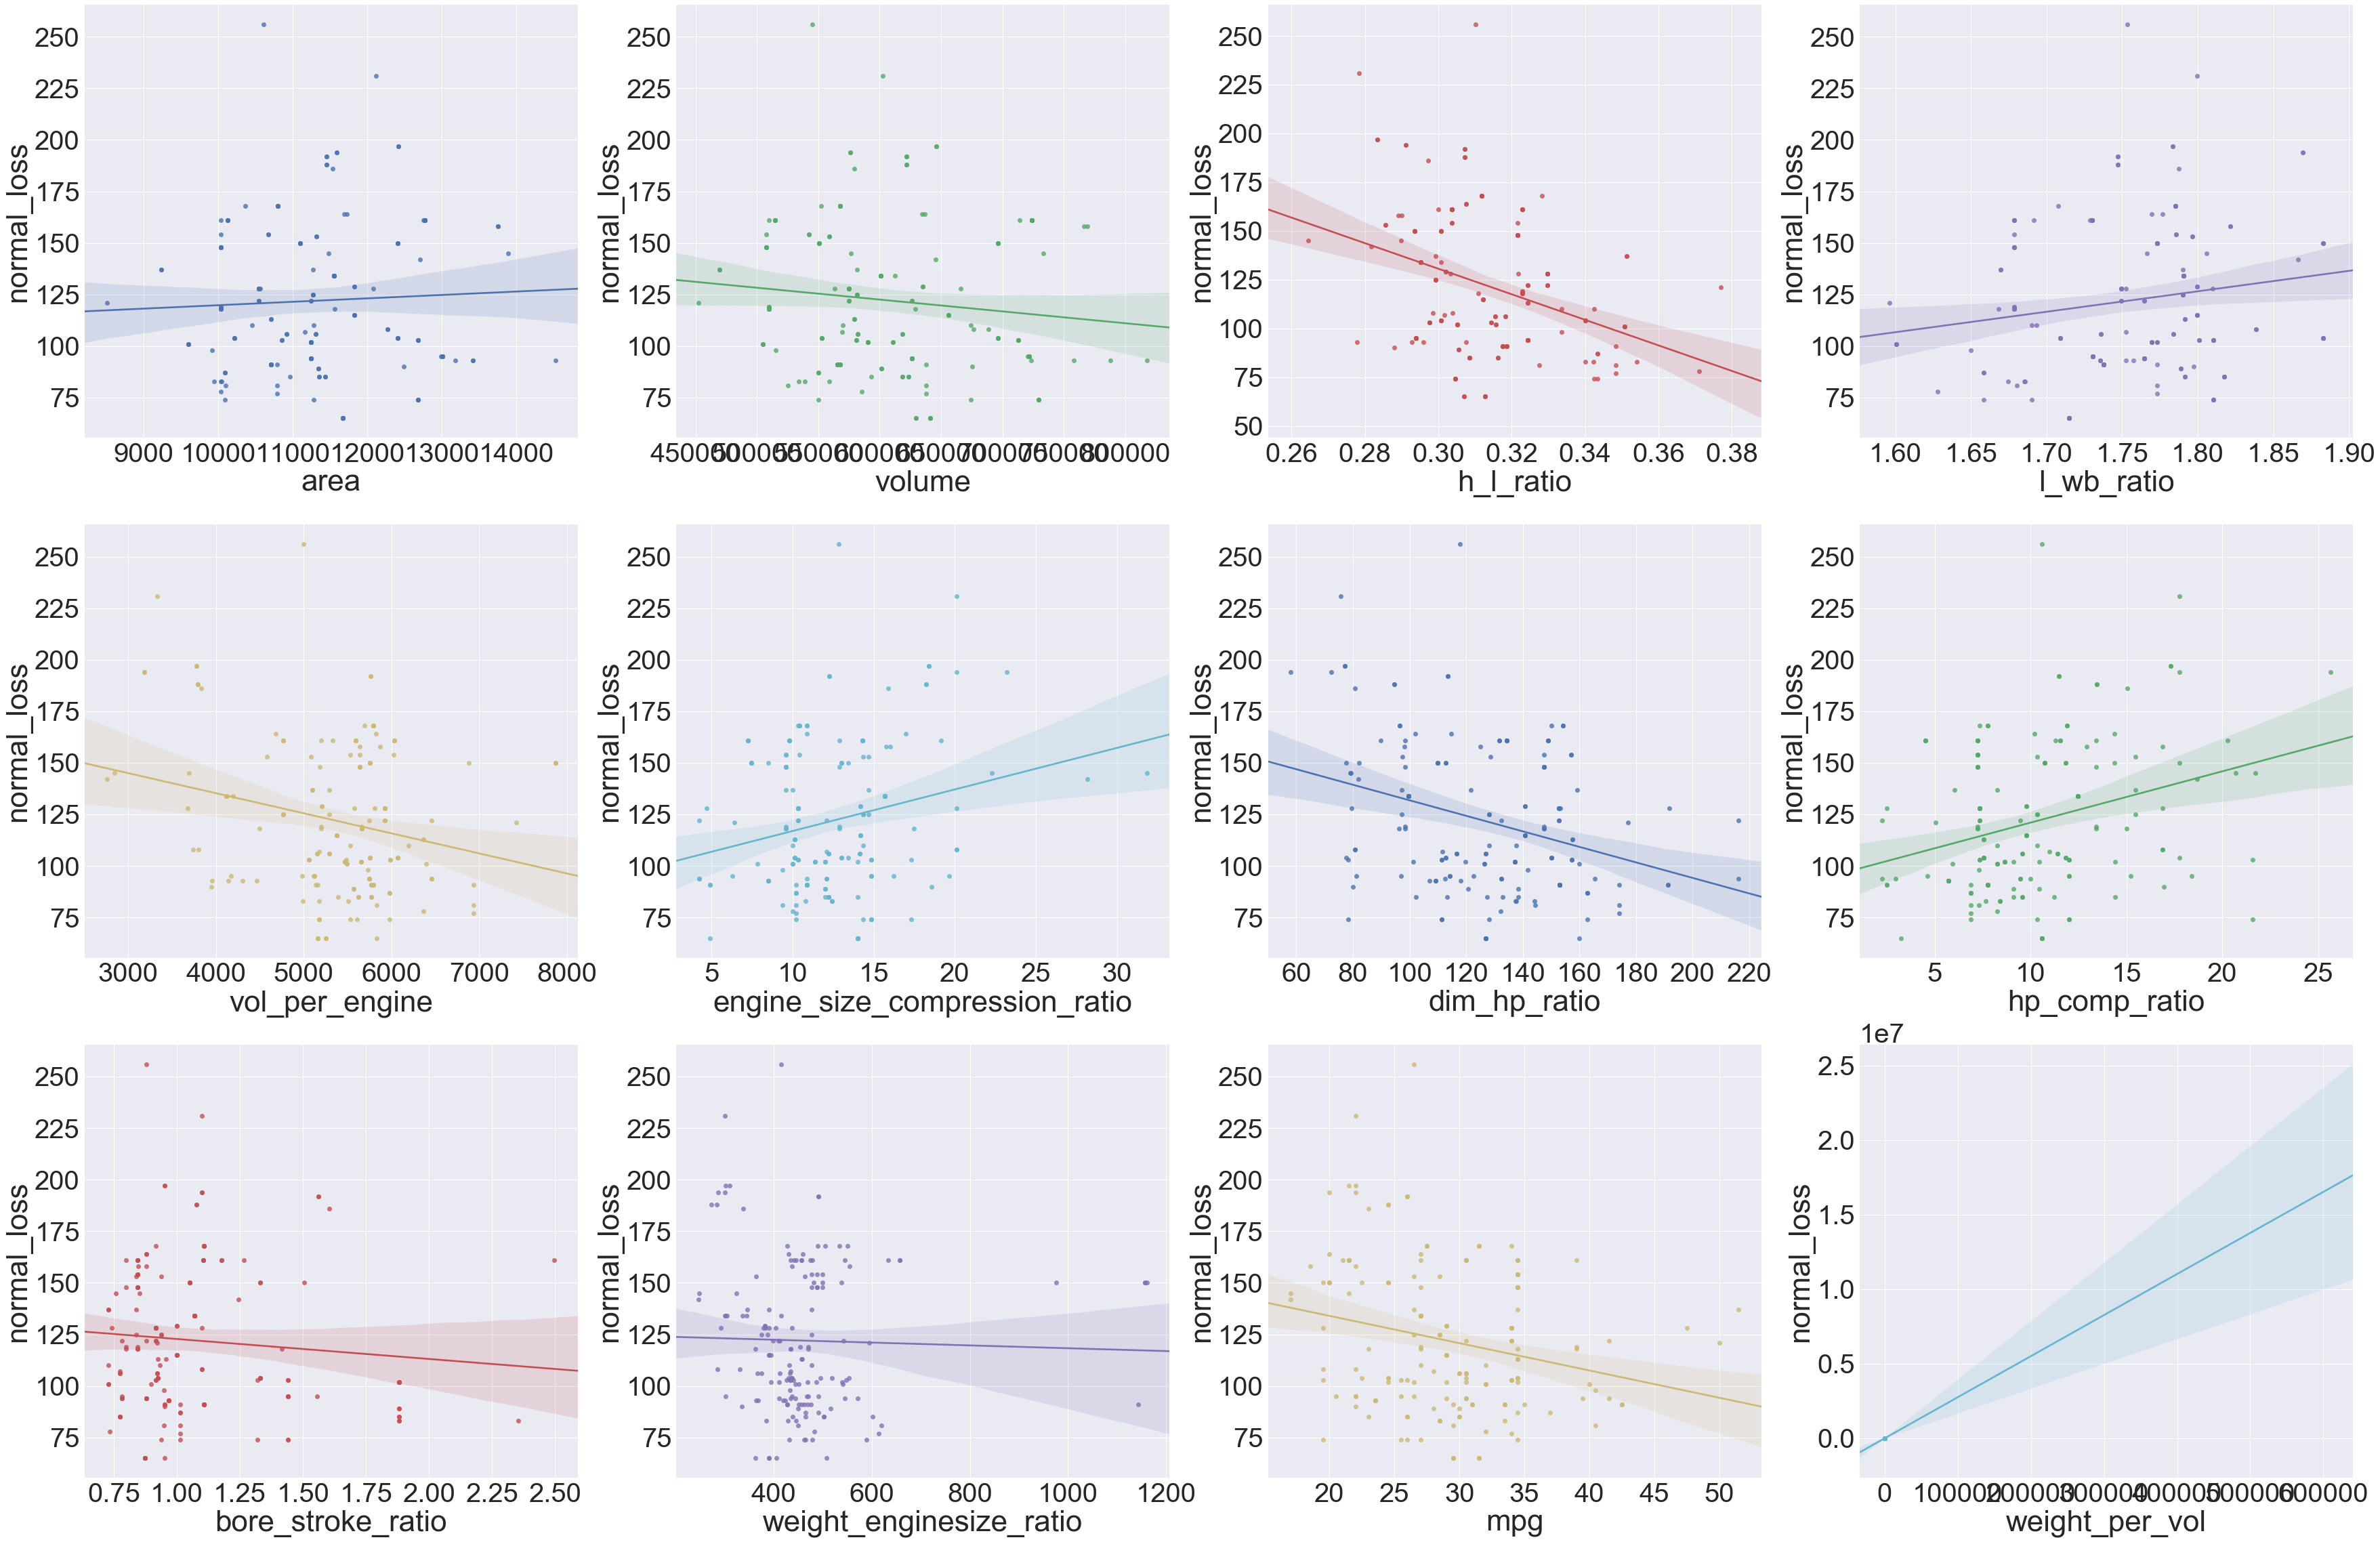

In [81]:
plt.clf()
data_3_b_col = data_3_b.columns
with plt.style.context("seaborn-dark"):
    sns.set(font_scale=4)
    f, axes = plt.subplots(3, 4, figsize =(60, 40))
    for num, ax in zip(range(1,13), axes.flat):
        sns.regplot(x = data_3_b.iloc[:,num], y = data_3_b.loc[:,'normal_loss'],
                   ax = ax)

#### The last graph has displaying issue that I could find the cause. I drew the seperate graph below for 'weight_per_vol'.

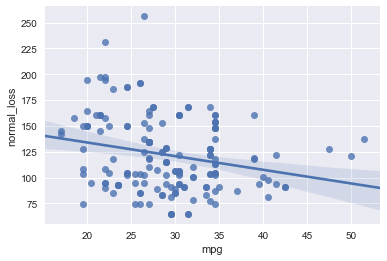

In [82]:
sns.regplot(x = data_3_b.iloc[:,11], y = data_3_b.loc[:,'normal_loss'])

In [83]:
corr_list = {}
for col in data_3_b_col:
    corr_list[col] =  data_3_b['normal_loss'].corr(data_3_b[col])
    corr_abs = [abs(i) for i in corr_list.values()]
print (sum(corr_abs[1:]) / len(col_num))
sorted(corr_list.items(), key=operator.itemgetter(1))

0.164785259792


[('h_l_ratio', -0.34691405601934672),
 ('dim_hp_ratio', -0.31421004798894536),
 ('vol_per_engine', -0.24278875387686918),
 ('mpg', -0.23562705501296785),
 ('volume', -0.11799296696998014),
 ('bore_stroke_ratio', -0.090308803590171086),
 ('weight_enginesize_ratio', -0.027449843611775278),
 ('area', 0.049112629923675752),
 ('l_wb_ratio', 0.16505053654613014),
 ('engine_size_compression_ratio', 0.23450776101379159),
 ('hp_comp_ratio', 0.29934944279145492),
 ('weight_per_vol', 0.3484669995372518),
 ('normal_loss', 1.0)]

In [84]:
# Concat with 'high correlation features' from the original dataframe
data_3_b = pd.concat([data_3_b, data_2[['height', 'peak_rpm', 'price']]], axis=1)
# Delete 'low correlation features' from the modified dataframe
data_3_b.drop(['h_l_ratio', 'weight_enginesize_ratio', 'engine_size_compression_ratio', 'area', 'volume'], axis=1, inplace = True)

#### Overall correlation has been improved.

In [85]:
corr_list = {}
for col in data_3_b.columns:
    corr_list[col] =  data_3_b['normal_loss'].corr(data_3_b[col])
    corr_abs = [abs(i) for i in corr_list.values()]
print (sum(corr_abs[1:]) / len(col_num))
sorted(corr_list.items(), key=operator.itemgetter(1))

0.173065857639


[('height', -0.43233484165214997),
 ('dim_hp_ratio', -0.31421004798894536),
 ('vol_per_engine', -0.24278875387686918),
 ('mpg', -0.23562705501296785),
 ('bore_stroke_ratio', -0.090308803590171086),
 ('l_wb_ratio', 0.16505053654613014),
 ('price', 0.20325417074184232),
 ('peak_rpm', 0.26459721284190835),
 ('hp_comp_ratio', 0.29934944279145492),
 ('weight_per_vol', 0.3484669995372518),
 ('normal_loss', 1.0)]

In [86]:
features = "+".join(data_3_b.columns[1:])
y, X = dmatrices('normal_loss~' + features, data_3_b, return_type='dataframe')

vif = pd.DataFrame()
vif["VIF_Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

vif.round(2)

,VIF_Factor,features
0,4304.61,Intercept
1,1.47,l_wb_ratio
2,3.05,vol_per_engine
3,8.79,dim_hp_ratio
4,5.07,hp_comp_ratio
5,1.24,bore_stroke_ratio
6,5.71,mpg
7,4.37,weight_per_vol
8,1.81,height
9,2.02,peak_rpm


#### The selected variables have lower VIF compared to the previous one. In addition to it, the overall corelation was increased while dimension has been reduced form 14 to 10.  Although it is still unknown if the new features would increase the prediction performance, the new features reduces the risk of multicolinearity and high dimension problems.

### Option - 2) Using PCA

#### PCA requires train/test set split and scale standardization. To make the process simpler, I will postpone this process to the later stage.(The PCA was done in modeling & cross-validating stage)

### B: Categorical Variables

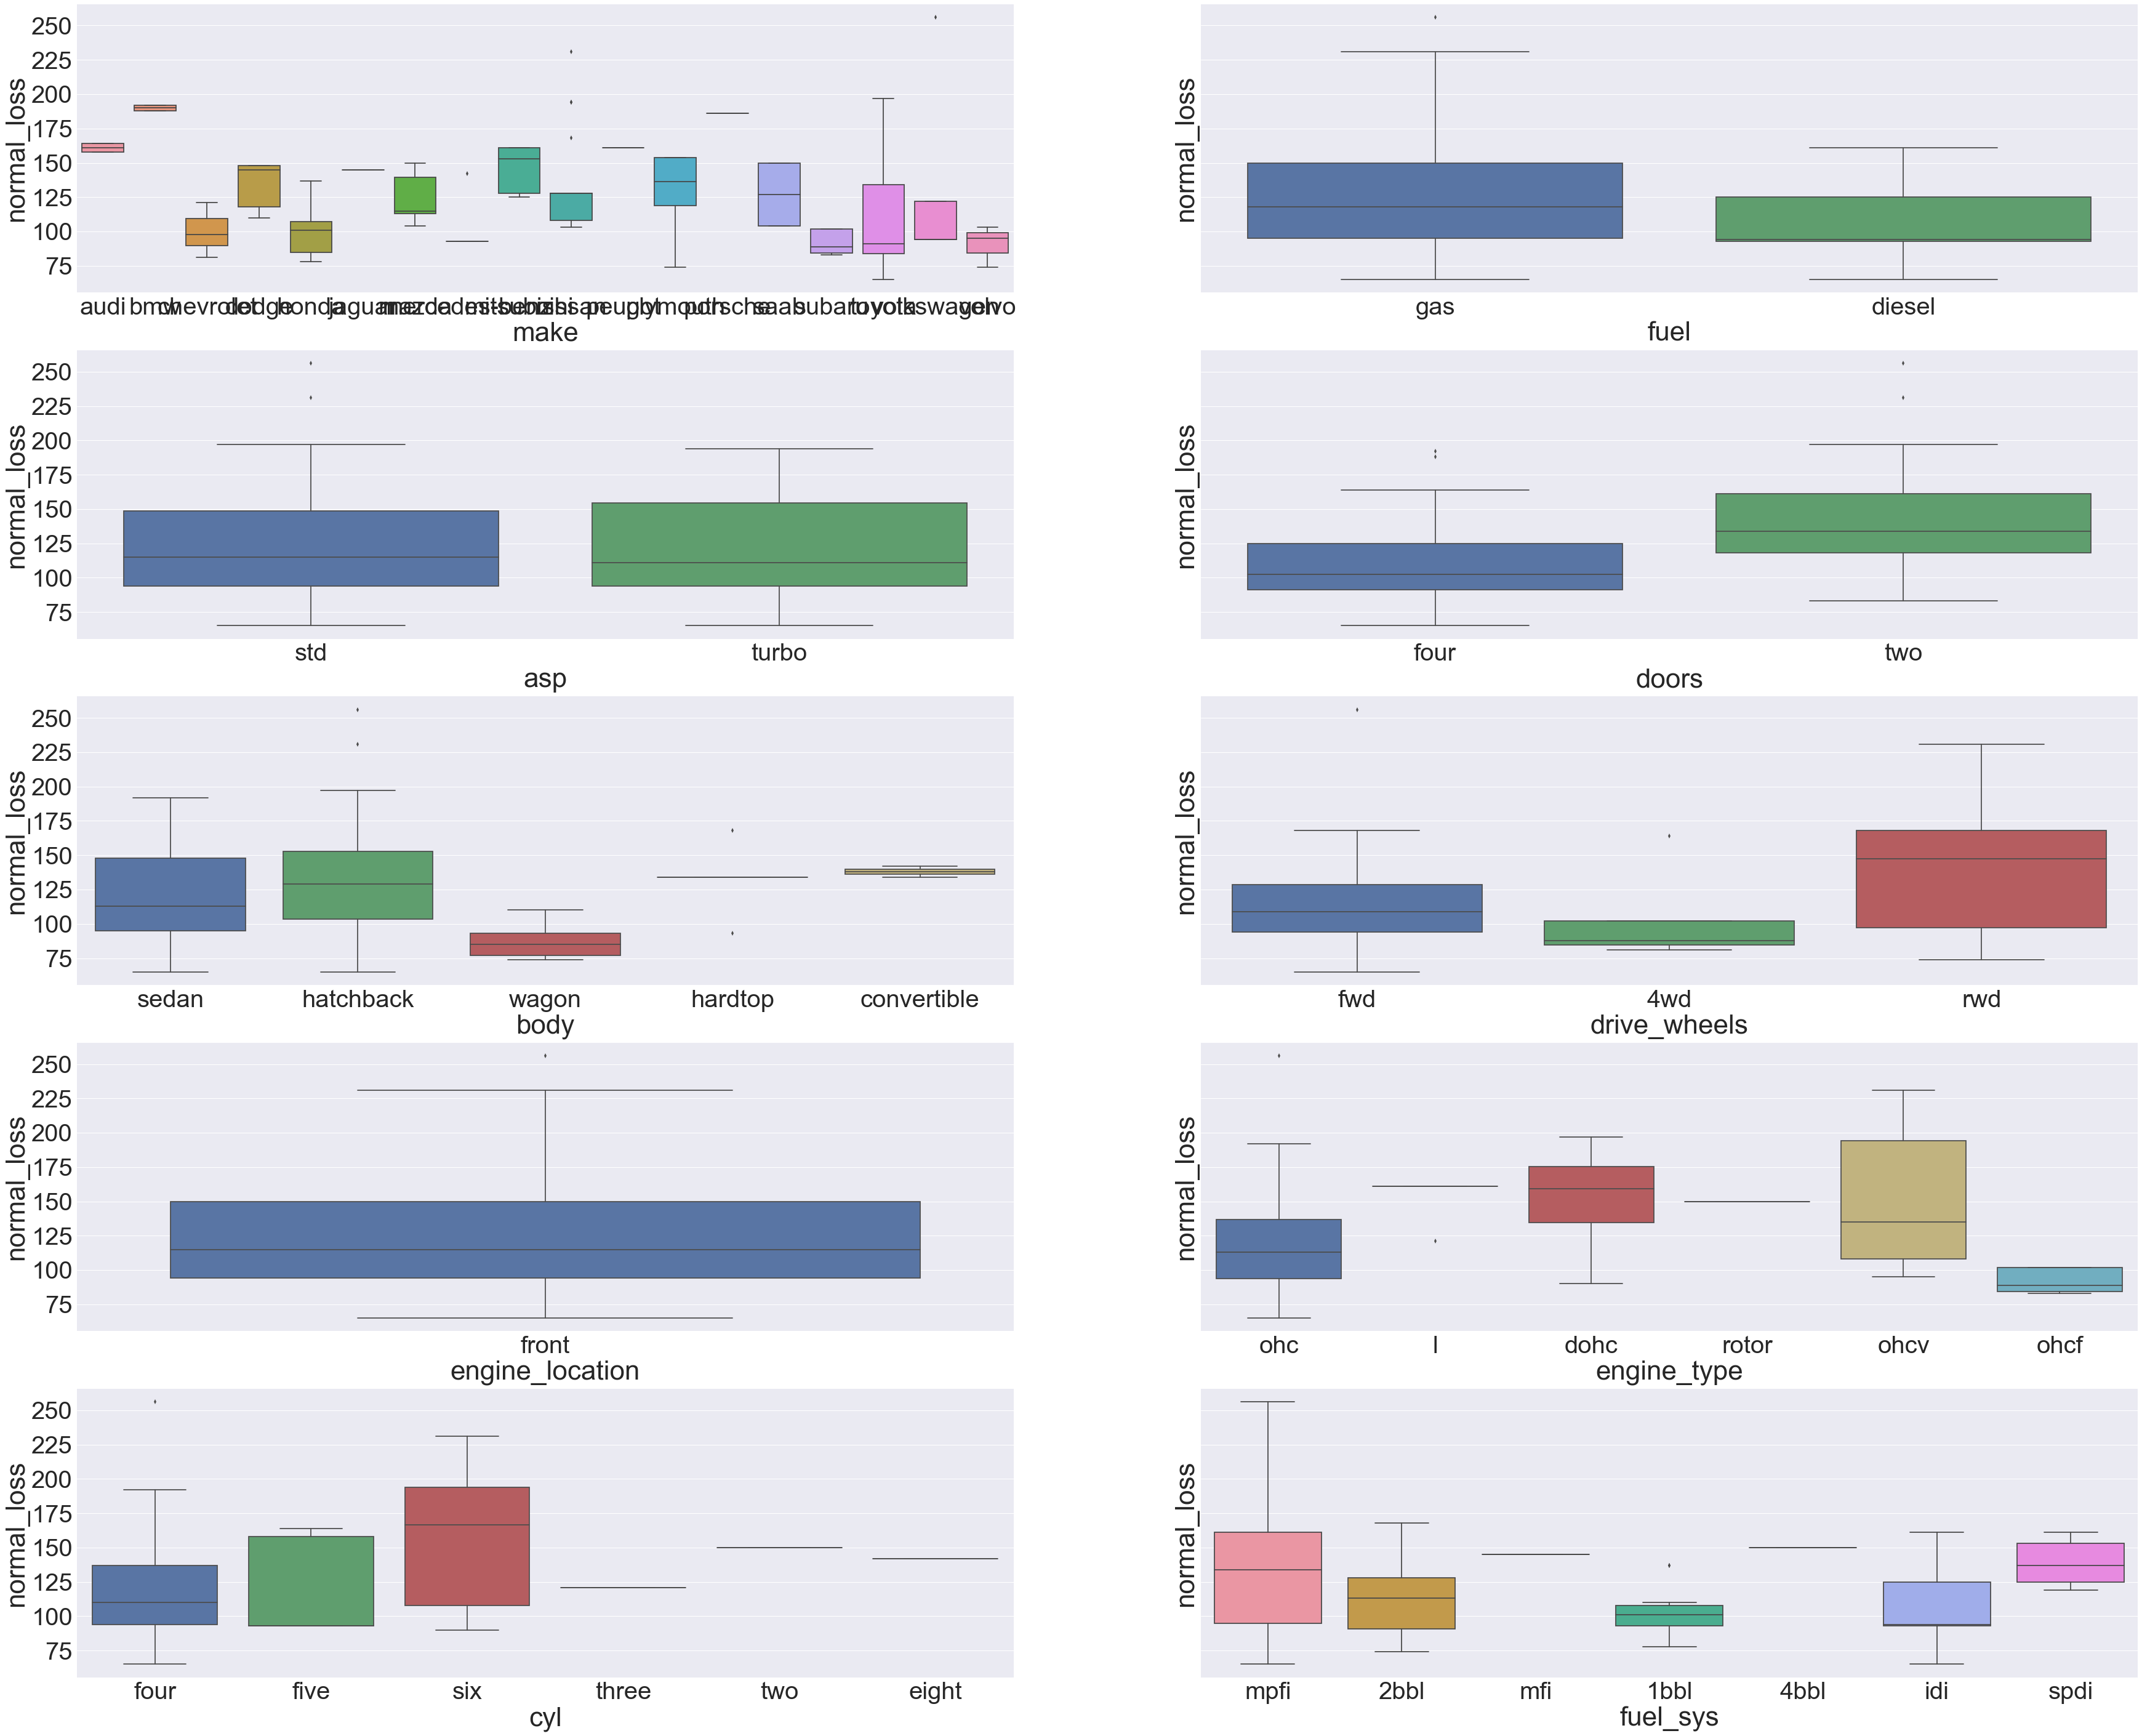

In [87]:
plt.clf()
with plt.style.context("seaborn-dark"):
    sns.set(font_scale=4)
    f, axes = plt.subplots(5, 2, figsize =(60, 50), sharey=True)
    for num, ax in zip(range(0,10), axes.flat):
        sns.boxplot(x = data_2[col_cat].iloc[:, num], y = data_2[col_num].iloc[:,0],
                   ax = ax)

### Column - 'Make'

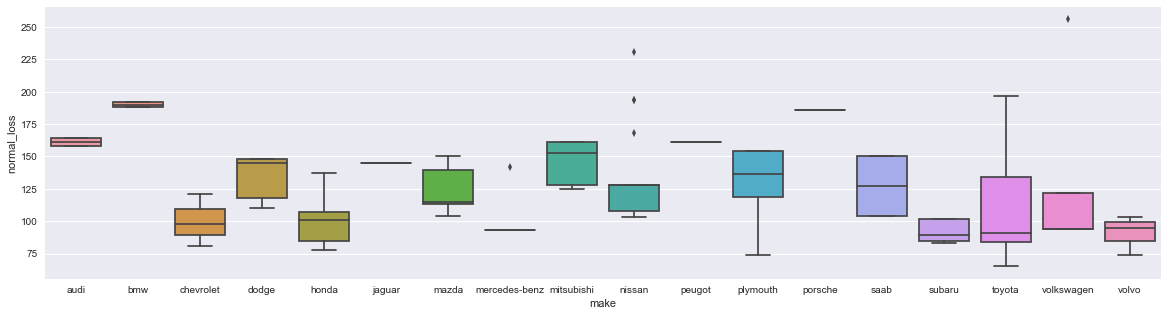

In [88]:
# Taking a closer look of column 'make', which seemed to be considered as important features in benchmark R.F.
plt.figure(figsize = (20, 5))
sns.boxplot(x = data_2[col_cat].iloc[:, 0], y = data_2[col_num].iloc[:,0] )

In [89]:
# Among mean, truncated mean, median, and mode, I chose 'median' to represent the data.
data_2.groupby('make').normal_loss.median().sort_values()

make
subaru            89.0
toyota            91.0
mercedes-benz     93.0
volkswagen        94.0
volvo             95.0
chevrolet         98.0
honda            101.0
mazda            115.0
saab             127.0
nissan           128.0
plymouth         136.5
dodge            145.0
jaguar           145.0
mitsubishi       153.0
peugot           161.0
audi             161.0
porsche          186.0
bmw              190.0
Name: normal_loss, dtype: float64

#### One-hot-encoding all makers create too many dimensions relative to the size of the data. I will reduce it to three categories considering medium values and quantiles from the above graph.  The 3 categories were determined by dividing the median range(89 ~ 190) by 3, then include the makers that are in range of each group.
* low_risk: median < 122.7
* moderate_risk: 122.7 <= median < 156.3
* high_risk: median >= 156.3

In [90]:
# low_risk: median < (median range) / 3
low_risk = ['subaru', 'toyota', 'mercedes-benz', 'volkswagen', 'volvo', 'chevrolet', 'honda', 'mazda']
moderate_risk = ['saab', 'nissan', 'plymouth', 'dodge', 'jaguar', 'mitsubishi']
high_risk = ['peugot', 'audi', 'porche', 'bmw']

def convert_to_grade(make):
    if make in low_risk:
        return 'low_risk'
    elif make in moderate_risk:
        return 'mod_risk'
    else:
        return 'high_risk'

In [91]:
data_3_b.head()

,normal_loss,l_wb_ratio,vol_per_engine,dim_hp_ratio,hp_comp_ratio,bore_stroke_ratio,mpg,weight_per_vol,height,peak_rpm,price
0,164,1.769539,5824.008771,114.616863,10.200000,0.880285,27.0,3.681376,54.3,5500,13950
1,164,1.776660,4681.873765,101.967304,14.375000,0.880285,20.0,4.435127,54.3,5500,17450
2,158,1.821361,5635.029750,125.079818,12.941176,0.880285,22.0,3.711030,55.7,5500,17710
3,158,1.821361,5871.112992,98.277000,16.867470,0.847483,18.5,4.012400,55.9,5500,23875
4,192,1.747036,5760.144000,113.432079,11.477273,1.562500,26.0,3.849891,54.3,5800,16430


In [92]:
data_3_a = pd.concat([data_3_a, data_2[col_cat]], axis=1, copy = False)
data_3_a = data_3_a.assign(make_risk = lambda x: x.make.map(convert_to_grade))
data_3_a.drop('make', axis = 1, inplace = True)

data_3_b = pd.concat([data_3_b, data_2[col_cat]], axis=1, copy = False)
data_3_b = data_3_b.assign(make_risk = lambda x: x.make.map(convert_to_grade))
data_3_b.drop('make', axis = 1, inplace = True)

data_3_c = pd.concat([data_3_c, data_2[col_cat]], axis=1, copy = False)
data_3_c = data_3_c.assign(make_risk = lambda x: x.make.map(convert_to_grade))
data_3_c.drop('make', axis = 1, inplace = True)

In [93]:
data_3_a.columns

Index(['normal_loss', 'wheel_base', 'length', 'width', 'height', 'weight',
       'engine_size', 'bore', 'stroke', 'compression', 'horsepower',
       'peak_rpm', 'mpg_city', 'mpg_highway', 'price', 'fuel', 'asp', 'doors',
       'body', 'drive_wheels', 'engine_location', 'engine_type', 'cyl',
       'fuel_sys', 'make_risk'],
      dtype='object')

### Columns - 'Fuel', 'ASP', 'Doors'

#### Fuel, asp, doors are binary(2 classes) but I am not sure if they are significantly different. If the target value of two classes are not significantly different, I can just drop the variables. 

In [94]:
import scipy.stats as stats

#### ANOVA Analysis can be a good guidance to make a decision for dropping the column with only two classes.

In [95]:
# Use Shapiro if the 1-way ANOVA assumption is met, otherwise, use Kruskal non-parametric method.
def anova_check(var, a, b):
    # Checking the normal distribution
    print ("Checking the distribution normality")
    normal_1 = stats.shapiro(data_2.loc[data_2[var] == a].normal_loss)
    normal_2 = stats.shapiro(data_2.loc[data_2[var] == b].normal_loss)
    print ("p-value", normal_1[1])
    print ("p-value", normal_2[1])
    
    # Checking the homoscedasticity
    print ("Checking the homoscedasticity")
    homo = stats.levene(data_2.loc[data_2[var] == a].normal_loss, 
             data_2.loc[data_2[var] == b].normal_loss,
             center="mean")
    print ("p-value", homo[1])
    
    # ANOVA Test
    if (normal_1[1] < 0.05) & (normal_2[1] < 0.05) & (homo[1] < 0.05):
        anova = stats.f_oneway(data_2.loc[data_2[var] == a].normal_loss,
                  data_2.loc[data_2[var] == b].normal_loss)
        print ("1-way ANOVA was calculated since p-value < 0.05")
        print (anova)
    else:
        anova = stats.kruskal(data_2.loc[data_2[var] == a].normal_loss,
                      data_2.loc[data_2[var] == b].normal_loss)
        print ("Kruskal-Wallis ANOVA was calcualted since p-value > 0.05")
        print (anova)
    

In [96]:
anova_check('fuel', 'gas', 'diesel')

Checking the distribution normality
p-value 7.710604404564947e-05
p-value 0.0025278031826019287
Checking the homoscedasticity
p-value 0.442985291349
Kruskal-Wallis ANOVA was calcualted since p-value > 0.05
KruskalResult(statistic=2.4542967920365535, pvalue=0.11720364707380934)


In [97]:
anova_check('asp', 'std', 'turbo')

Checking the distribution normality
p-value 5.673891064361669e-05
p-value 0.01793091930449009
Checking the homoscedasticity
p-value 0.779910024328
Kruskal-Wallis ANOVA was calcualted since p-value > 0.05
KruskalResult(statistic=0.00017205427951688687, pvalue=0.9895344911910442)


In [98]:
anova_check('doors', 'four', 'two')

Checking the distribution normality
p-value 9.518643310002517e-06
p-value 0.015515103936195374
Checking the homoscedasticity
p-value 0.353927555126
Kruskal-Wallis ANOVA was calcualted since p-value > 0.05
KruskalResult(statistic=27.225747718555606, pvalue=1.8103170474718345e-07)


#### Only 'Doors' has the p-value less than 0.05.  Surprisingly, 'doors' was the feature with higher importance in benchmark R.F.

In [99]:
print (data_3_a.columns)
print (data_3_b.columns)
print (data_3_c.columns)

Index(['normal_loss', 'wheel_base', 'length', 'width', 'height', 'weight',
       'engine_size', 'bore', 'stroke', 'compression', 'horsepower',
       'peak_rpm', 'mpg_city', 'mpg_highway', 'price', 'fuel', 'asp', 'doors',
       'body', 'drive_wheels', 'engine_location', 'engine_type', 'cyl',
       'fuel_sys', 'make_risk'],
      dtype='object')
Index(['normal_loss', 'l_wb_ratio', 'vol_per_engine', 'dim_hp_ratio',
       'hp_comp_ratio', 'bore_stroke_ratio', 'mpg', 'weight_per_vol', 'height',
       'peak_rpm', 'price', 'fuel', 'asp', 'doors', 'body', 'drive_wheels',
       'engine_location', 'engine_type', 'cyl', 'fuel_sys', 'make_risk'],
      dtype='object')
Index(['normal_loss', 'wheel_base', 'length', 'width', 'height', 'weight',
       'engine_size', 'bore', 'stroke', 'compression', 'horsepower',
       'peak_rpm', 'mpg_city', 'mpg_highway', 'price', 'fuel', 'asp', 'doors',
       'body', 'drive_wheels', 'engine_location', 'engine_type', 'cyl',
       'fuel_sys', 'make_risk'],


In [100]:
# Delete the columns with p-value > 0.05
for df in [data_3_a, data_3_b, data_3_c]:
    df.drop('fuel', axis = 1, inplace = True) 
    df.drop('asp', axis = 1, inplace = True) 

### Columns - 'Body' , 'Engine_Location'

#### The graph shows that we may not have enough samples for 'hardtop'. 

In [101]:
data_2['body'].value_counts()

sedan          80
hatchback      60
wagon          17
hardtop         5
convertible     2
Name: body, dtype: int64

#### Since 'Hardtop' is a subtype of 'Convertible', I will combine them together.
#### Also, because 'engine_location' has a single class,  I I will remove the feature. 

In [102]:
for df in [data_3_a, data_3_b, data_3_c]:
    df['body'].replace('hardtop', 'convertible', inplace = True, regex = True)
    df.drop('engine_location', axis = 1, inplace = True)

In [103]:
# Validation
print (data_3_b['body'].value_counts())
print (data_3_b.columns)

sedan          80
hatchback      60
wagon          17
convertible     7
Name: body, dtype: int64
Index(['normal_loss', 'l_wb_ratio', 'vol_per_engine', 'dim_hp_ratio',
       'hp_comp_ratio', 'bore_stroke_ratio', 'mpg', 'weight_per_vol', 'height',
       'peak_rpm', 'price', 'doors', 'body', 'drive_wheels', 'engine_type',
       'cyl', 'fuel_sys', 'make_risk'],
      dtype='object')


### Column - 'Engine_Type'

#### Engine type is also seriously imbalanced

In [104]:
data_2['engine_type'].value_counts()

ohc      124
ohcf      12
ohcv       8
dohc       8
l          8
rotor      4
Name: engine_type, dtype: int64

#### As we can find from below, most engine types represent the technology that is associated with a certain car maker.  The exceptions are 'ohc' and 'dohc', which are the most common and popular engine type through out the models. 

In [105]:
for engine in data_2['engine_type'].unique():
    print ("The Engine Type: ", engine)
    print (data_2[data_2['engine_type'] == engine].make.value_counts())
    print ("=========================")

The Engine Type:  ohc
toyota           26
honda            13
nissan           12
mazda            11
volvo            10
mitsubishi       10
dodge             9
volkswagen        8
plymouth          6
mercedes-benz     4
audi              4
bmw               4
saab              4
chevrolet         2
porsche           1
Name: make, dtype: int64
The Engine Type:  l
peugot       7
chevrolet    1
Name: make, dtype: int64
The Engine Type:  dohc
toyota    5
saab      2
jaguar    1
Name: make, dtype: int64
The Engine Type:  rotor
mazda    4
Name: make, dtype: int64
The Engine Type:  ohcv
nissan           6
mercedes-benz    1
volvo            1
Name: make, dtype: int64
The Engine Type:  ohcf
subaru    12
Name: make, dtype: int64


#### I will keep this feature as it is because of two reasons:
* 'Make' information was aggregated to 'make_risk' to reduce the dimension. The information provided from 'engine_type', since it is deeply associated to 'make' class, may compensate the loss. 
* The bench-mark R.F has shown that 'engine_type' was pretty important feature. It will be risky to drop the feature.

### Column - 'Cyl'

#### Cylinder needs some adjustment, too.

In [106]:
data_2['cyl'].value_counts()

four     137
six       14
five       7
two        4
three      1
eight      1
Name: cyl, dtype: int64

In [107]:
data_2[data_2['cyl'] == 'two'].engine_type

39    rotor
40    rotor
41    rotor
42    rotor
Name: engine_type, dtype: object

In [108]:
data_2[data_2['cyl'] == 'two'].make

39    mazda
40    mazda
41    mazda
42    mazda
Name: make, dtype: object

#### Some domain knowledge needs to be put here. Mazda uses 'rotary' engine that is different from regular cylnder engine. 2 Rotors is not equivalent to 2 Cynlinder
* https://oppositelock.kinja.com/comparing-piston-and-rotary-displacement-1139838430
* Referencing the link above, I will switch 'two' to 'four'.
* I will also replace 'three' and 'eight' to the closest cylinder. 

In [109]:
data_2[data_2['cyl'] == 'eight']

,normal_loss,wheel_base,length,width,height,weight,engine_size,bore,stroke,compression,...,make,fuel,asp,doors,body,drive_wheels,engine_location,engine_type,cyl,fuel_sys
53,142,96.6,180.3,70.5,50.8,3685,234,3.46,3.1,8.3,...,mercedes-benz,gas,std,two,convertible,rwd,front,ohcv,eight,mpfi


In [110]:
data_2[data_2['cyl'] == 'three']

,normal_loss,wheel_base,length,width,height,weight,engine_size,bore,stroke,compression,...,make,fuel,asp,doors,body,drive_wheels,engine_location,engine_type,cyl,fuel_sys
8,121,88.4,141.1,60.3,53.2,1488,61,2.91,3.03,9.5,...,chevrolet,gas,std,two,hatchback,fwd,front,l,three,2bbl


In [111]:
for df in [data_3_a, data_3_b, data_3_c]:
    df['cyl'].replace('eight', 'six', inplace = True, regex = True)
    df['cyl'].replace('three', 'four', inplace = True, regex = True)
    df['cyl'].replace('two', 'four', inplace = True, regex = True) # Mazda rotary

### Column - 'Fuel_Sys'

#### Modifying 'fuel_sys' is more difficult because it requires more knowledge. 

In [112]:
data_2['fuel_sys'].value_counts()

mpfi    66
2bbl    63
idi     15
1bbl    11
spdi     5
4bbl     3
mfi      1
Name: fuel_sys, dtype: int64

#### ANOVA test states that variance of each group is statistically different.

In [113]:
stats.kruskal(data_2.loc[data_2["fuel_sys"] == "mpfi"].normal_loss,
              data_2.loc[data_2["fuel_sys"] == "2bbl"].normal_loss,
              data_2.loc[data_2["fuel_sys"] == "idi"].normal_loss,
              data_2.loc[data_2["fuel_sys"] == "1bbl"].normal_loss,
              data_2.loc[data_2["fuel_sys"] == "spdi"].normal_loss,
              data_2.loc[data_2["fuel_sys"] == "4bbl"].normal_loss,
              data_2.loc[data_2["fuel_sys"] == "mfi"].normal_loss)

KruskalResult(statistic=14.668002764006481, pvalue=0.023002183427268709)

#### To reduce the sparsity of the data, I will combine few classes that are from the same root and the result of ANOVA test suggests null hypothesis.

In [114]:
stats.kruskal(data_2.loc[data_2["fuel_sys"] == "mpfi"].normal_loss,
              data_2.loc[data_2["fuel_sys"] == "mfi"].normal_loss)

KruskalResult(statistic=0.11320056785234088, pvalue=0.73652934806020287)

In [115]:
stats.kruskal(data_2.loc[data_2["fuel_sys"] == "1bbl"].normal_loss,
              data_2.loc[data_2["fuel_sys"] == '2bbl'].normal_loss)

KruskalResult(statistic=1.5930346387339185, pvalue=0.20689310387744686)

In [116]:
for df in [data_3_a, data_3_b, data_3_c]:
    df['fuel_sys'].replace('1bbl', 'bbl', inplace = True, regex = True)
    df['fuel_sys'].replace('2bbl', 'bbl', inplace = True, regex = True)
    df['fuel_sys'].replace('4bbl', 'bbl', inplace = True, regex = True)
    df['fuel_sys'].replace('mfi', 'mpfi', inplace = True, regex = True)

In [117]:
data_3_c['fuel_sys'].value_counts()

bbl     77
mpfi    67
idi     15
spdi     5
Name: fuel_sys, dtype: int64

# Model Fit and Prediction

In [1]:
from sklearn.decomposition import PCA
from sklearn.linear_model import Lasso
from sklearn.grid_search import GridSearchCV

/Users/aceit/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/aceit/anaconda/lib/python3.6/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


#### Recap: Following DataFrames will be tested for Regression models
* data_2: As-Was
* data_3_a: Numeric(As-Was) + Category(Edited)
* data_3_b: Numeric(Arithmetic conversion) + Category(Edited)
* data_3_c: Numeric(PCA) + Category(Edited)

In [119]:
data_2 = pd.get_dummies(data_2, columns = col_cat)
data_3_a = pd.get_dummies(data_3_a, columns = data_3_a.columns[15:])
data_3_b = pd.get_dummies(data_3_b, columns = data_3_b.columns[11:])
data_3_c = pd.get_dummies(data_3_c, columns = data_3_c.columns[15:])  

In [120]:
for df in [data_2, data_3_a, data_3_b, data_3_c]:
    print (df.shape)

(164, 67)
(164, 40)
(164, 36)
(164, 40)


#### Because I will go through the similar steps while comparing model vs model for each data set, I will define a class called 'Data_Prep', which will make the process a lot simpler.

In [121]:
class Data_prep():
    def __init__(self, df):
        self.df = df
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.df.iloc[:,1:], 
                                                                                self.df['normal_loss'], 
                                                                                random_state = 0, 
                                                                                test_size = 0.2)
    def define_category(self, num):
        self.cat_start = num
    
    def scale(self):
        scaler = RobustScaler()
        self.X_train_num = pd.DataFrame(scaler.fit_transform(self.X_train.iloc[:, : self.cat_start]), 
                                       columns = self.X_train.columns[:self.cat_start]) 
        self.X_train_num.reset_index(drop = True, inplace = True)
        self.X_train_cat = self.X_train.iloc[:, self.cat_start:]
        self.X_train_cat.reset_index(drop = True, inplace = True)
        self.X_train = pd.concat([self.X_train_num, self.X_train_cat], axis = 1, copy = False )
        
        self.X_test_num = pd.DataFrame(scaler.transform(self.X_test.iloc[:, : self.cat_start]),
                                      columns = self.X_test.columns[:self.cat_start])
        self.X_test_num.reset_index(drop = True, inplace = True) 
        self.X_test_cat = self.X_test.iloc[:, self.cat_start:]
        self.X_test_cat.reset_index(drop = True, inplace = True)
        self.X_test = pd.concat([self.X_test_num, self.X_test_cat], axis = 1, copy = False )
        
    def grid_search(self, estimator, param_grid, scoring, cv):
        self.grid_search = GridSearchCV(estimator = estimator, param_grid = param_grid, 
             scoring = scoring, cv = 10)
        
    def lr_show_performance(self):
        self.grid_search.fit(self.X_train, self.y_train)
        self.best_est = self.grid_search.best_estimator_.fit(self.X_train, self.y_train)
        #self.grid_search.fit(self.X_train, self.y_train)
        print ("[The Cross-Validation Best Score: Negative MSE & R2]")
        print (self.grid_search.best_score_)
        print ("[The Cross-Validation Best Hyper-Parameter]")
        print (self.grid_search.best_params_)
        self.pred = self.best_est.predict(self.X_test)
        print ("[Test Score]")
        print (mean_squared_error(self.y_test, self.pred))
        print (r2_score(self.y_test, self.pred))
        print ("[The spread BTW val & test]")
        print ((self.grid_search.best_score_)*(-1) - mean_squared_error(self.y_test, self.pred))
  

    def rf_show_performance(self):
        self.grid_search.fit(self.X_train, self.y_train)
        self.best_est = self.grid_search.best_estimator_.fit(self.X_train, self.y_train)
        print ("[The Cross-Validation Best Score: Negative MSE]")
        print (self.grid_search.best_score_)
        print ("[The Cross-Validation Best Hyper-Parameter]")
        print (self.grid_search.best_params_)
        self.pred = self.best_est.predict(self.X_test)
        print ("[Test Score]")
        print (mean_squared_error(self.y_test, self.pred))
        print (r2_score(self.y_test, self.pred))
        print ("[The spread BTW val & test]")
        print ((self.grid_search.best_score_)*(-1) - mean_squared_error(self.y_test, self.pred))
        
    def rf_feature_importance(self):
            plt.figure(figsize=(25, 15))
            self.n_features = self.X_train.shape[1]
            plt.barh(range(self.n_features), self.best_est.feature_importances_)
            plt.yticks(np.arange(self.n_features), self.X_train.columns, fontsize = 14)
            plt.xlabel("Feature Importance")
            plt.ylabel("Features")

# Lasso Regression with Data_2
* Because data_2 has 65 features, Lasso was selected for automatic feature selection.

In [122]:
data_2_lasso = Data_prep(data_2)

In [123]:
data_2_lasso.define_category(14)
data_2_lasso.scale()

In [124]:
estimator = Lasso(max_iter=100000)
param_range = [0.01, 0.1, 1.0, 10.0, 100.0]
param_grid = {'alpha': param_range}

data_2_lasso.grid_search(estimator = estimator, param_grid = param_grid, 
                         scoring = 'neg_mean_squared_error', cv = 10)

In [125]:
data_2_lasso.lr_show_performance()

[The Cross-Validation Best Score: Negative MSE & R2]
-538.0722490996715
[The Cross-Validation Best Hyper-Parameter]
{'alpha': 0.1}
[Test Score]
375.395428342
0.546778690173
[The spread BTW val & test]
162.676820758


In [126]:
# Below are the USED features in Lasso model
data_2.columns[1:][np.where(data_2_lasso.best_est.coef_ != 0)]

Index(['wheel_base', 'length', 'height', 'weight', 'bore', 'compression',
       'peak_rpm', 'mpg_city', 'price', 'make_audi', 'make_bmw',
       'make_chevrolet', 'make_honda', 'make_mazda', 'make_mercedes-benz',
       'make_nissan', 'make_peugot', 'make_plymouth', 'make_saab',
       'make_subaru', 'make_toyota', 'make_volkswagen', 'make_volvo',
       'asp_std', 'doors_four', 'doors_two', 'body_convertible',
       'body_hardtop', 'body_hatchback', 'body_wagon', 'drive_wheels_fwd',
       'drive_wheels_rwd', 'engine_type_dohc', 'engine_type_l',
       'engine_type_ohcf', 'engine_type_rotor', 'cyl_eight', 'cyl_six',
       'cyl_two', 'fuel_sys_2bbl', 'fuel_sys_mpfi'],
      dtype='object')

# Random Forest with Data_2
* Although Random forest was already done for data_2 when I made 'quick benchmark', I'd try again with the same random seed and hyperparameter tuned.

In [127]:
data_2_rf = Data_prep(data_2)
# Scaling can be skipeed for the tree model
estimator = RandomForestRegressor(random_state=1, n_jobs= -1)
n_est = [10, 100, 1000]
max_f = ['auto', 'sqrt', 'log2']
param_grid = {'n_estimators': n_est, 'max_features': max_f}

data_2_rf.grid_search(estimator = estimator, param_grid = param_grid, 
                         scoring = 'neg_mean_squared_error', cv = 10)

In [128]:
data_2_rf.rf_show_performance()

[The Cross-Validation Best Score: Negative MSE]
-427.33145877862603
[The Cross-Validation Best Hyper-Parameter]
{'max_features': 'auto', 'n_estimators': 100}
[Test Score]
279.650466667
0.662373217073
[The spread BTW val & test]
147.680992112


# Lasso Regression for data_3_a

#### data_3_a has the numeric values as it was, with modified category values.

In [129]:
data_3_a_lasso = Data_prep(data_3_a)
data_3_a_lasso.define_category(14)
data_3_a_lasso.scale()

In [130]:
data_3_a_lasso.X_train.columns[14] # Should be 'doors_four'

'doors_four'

In [131]:
estimator = Lasso(max_iter=100000)
param_range = [0.01, 0.1, 1.0, 10.0, 100.0]
param_grid = {'alpha': param_range}

data_3_a_lasso.grid_search(estimator = estimator, param_grid = param_grid, 
                         scoring = 'neg_mean_squared_error', cv = 10)

In [132]:
data_3_a_lasso.lr_show_performance()

[The Cross-Validation Best Score: Negative MSE & R2]
-513.992923870158
[The Cross-Validation Best Hyper-Parameter]
{'alpha': 1.0}
[Test Score]
302.936300163
0.634259832729
[The spread BTW val & test]
211.056623707


#### There was a slight improvement in both Cross-Validation and Test set. 

# Random Forest Regression for data_3_a

In [133]:
data_3_a_rf = Data_prep(data_3_a)
# Scaling can be skipeed for the tree model
estimator = RandomForestRegressor(random_state=1, n_jobs= -1)
n_est = [10, 100, 1000]
max_f = ['auto', 'sqrt', 'log2']
param_grid = {'n_estimators': n_est, 'max_features': max_f}

data_3_a_rf.grid_search(estimator = estimator, param_grid = param_grid, 
                         scoring = 'neg_mean_squared_error', cv = 10)

In [134]:
data_3_a_rf.rf_show_performance()

[The Cross-Validation Best Score: Negative MSE]
-397.3380540698863
[The Cross-Validation Best Hyper-Parameter]
{'max_features': 'sqrt', 'n_estimators': 1000}
[Test Score]
285.177700312
0.655700093526
[The spread BTW val & test]
112.160353758


#### Random Forest regression with data_3_a has shown impressive performance, especially on average cross-valiation score.

#  Lasso Regression for data_3_b

#### data_3_b has arithmetically modified numeric values with modified category values.

In [135]:
data_3_b_lasso = Data_prep(data_3_b)
data_3_b_lasso.define_category(10)
data_3_b_lasso.scale()

In [136]:
data_3_b_lasso.X_train.columns[10] # Checking the index; Should be 'doors_four'

'doors_four'

In [137]:
estimator = Lasso(max_iter=100000)
param_range = [0.01, 0.1, 1.0, 10.0, 100.0]
param_grid = {'alpha': param_range}

data_3_b_lasso.grid_search(estimator = estimator, param_grid = param_grid, 
                         scoring = 'neg_mean_squared_error', cv = 10)
data_3_b_lasso.lr_show_performance()

[The Cross-Validation Best Score: Negative MSE & R2]
-499.7236775794584
[The Cross-Validation Best Hyper-Parameter]
{'alpha': 1.0}
[Test Score]
257.860850356
0.688680192863
[The spread BTW val & test]
241.862827224


#### This is the best score from using Linear Regression so far.  Maybe slight more improvement might be possible.

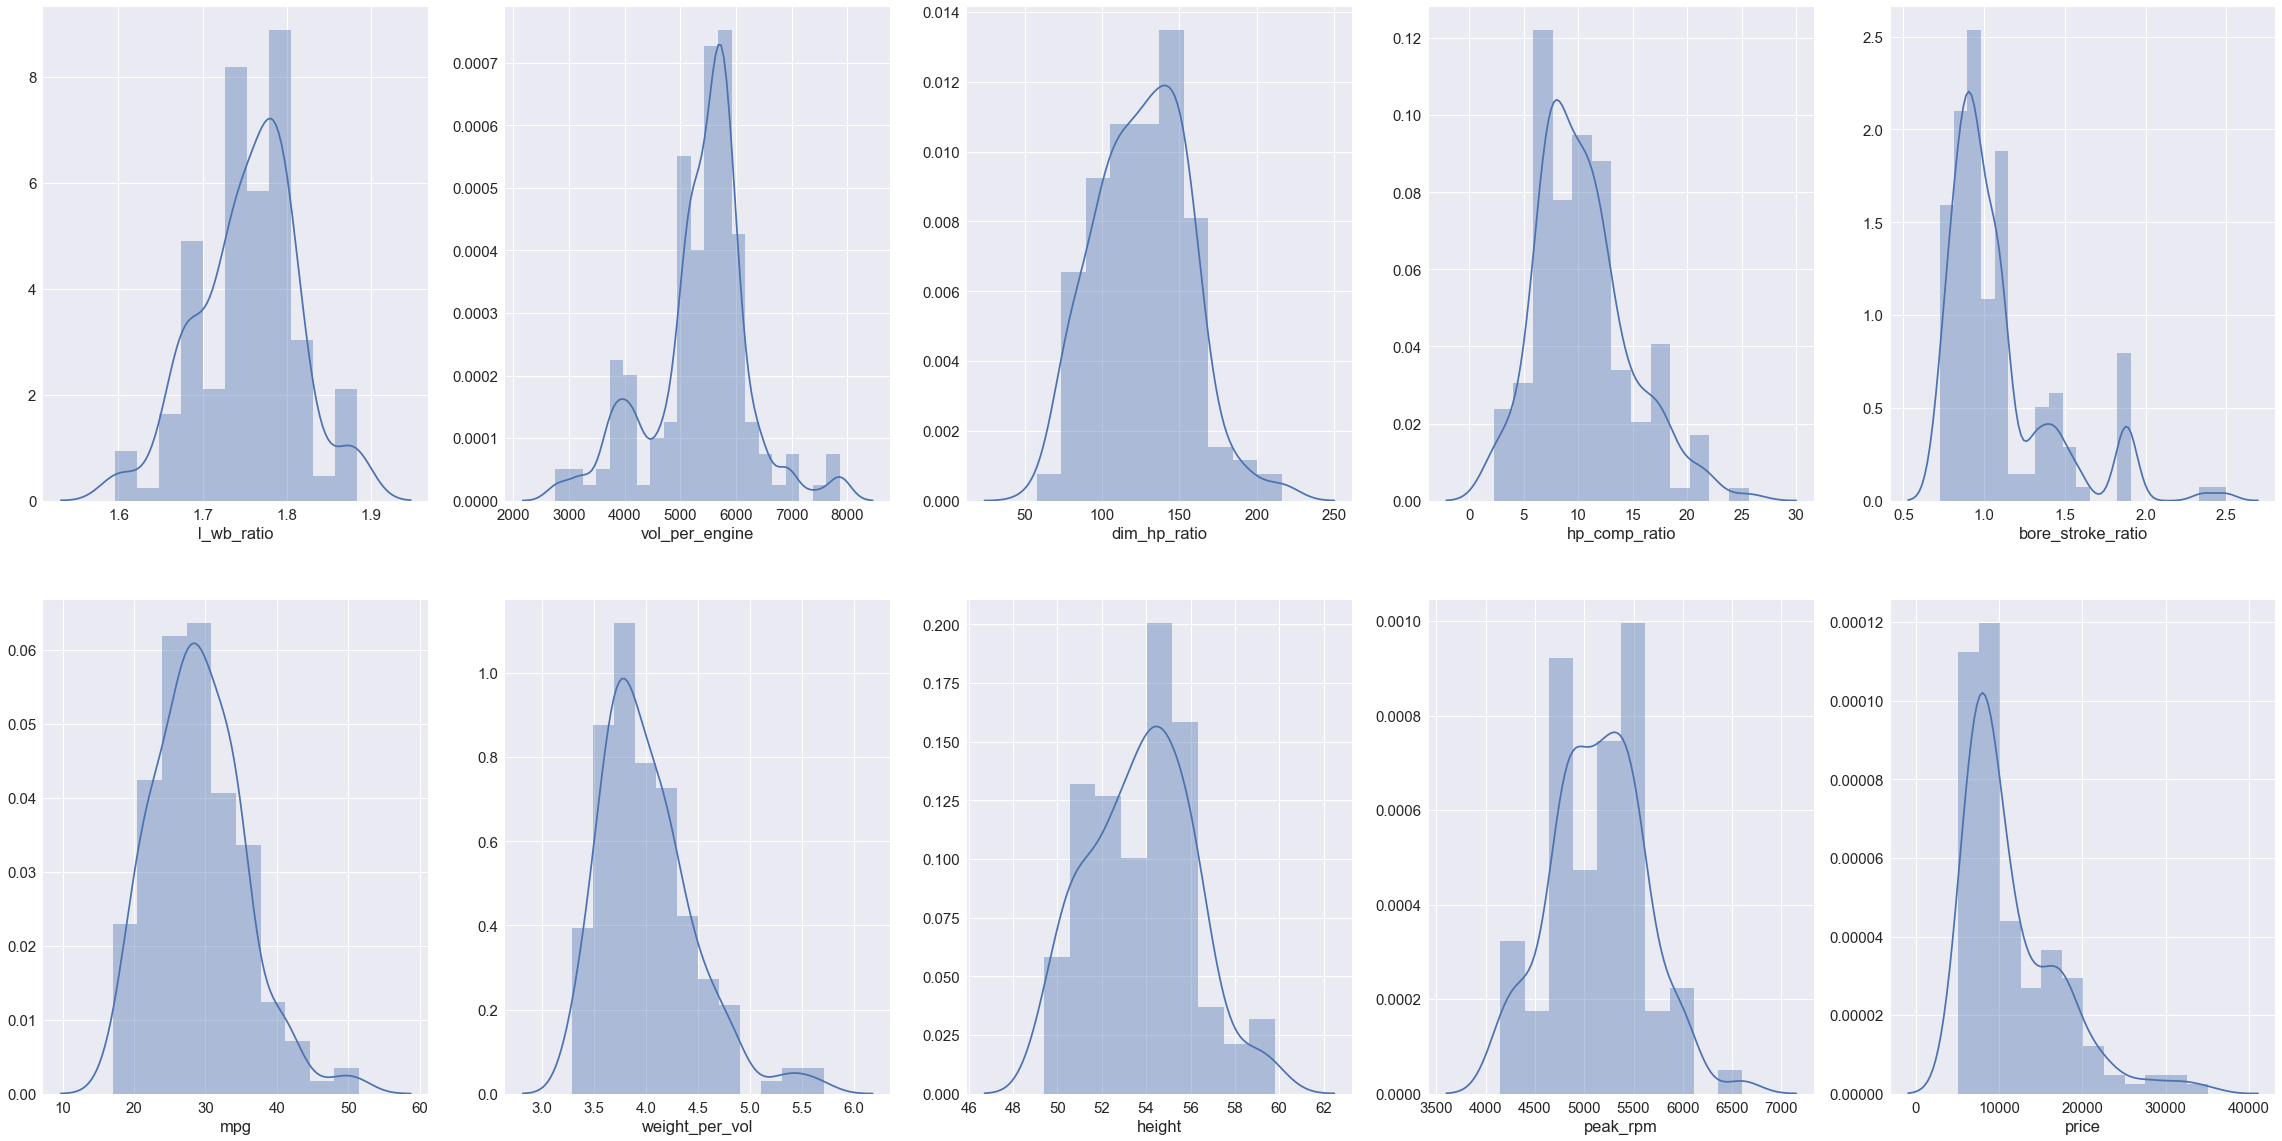

In [138]:
plt.clf()
with plt.style.context("seaborn-dark"):
    sns.set(font_scale=1.5)
    f, axes = plt.subplots(2, 5, figsize =(40, 20))
    for num, ax in zip(range(1,15), axes.flat):
        sns.distplot(a = data_3_b[data_3_b.columns[0+num]], ax = ax) 

#### The distribution graphs shows 'bore_stroke_ratio', and 'price'is far from the normal distributuin. I will use log conversion to these two features.

In [139]:
data_3_b_log = data_3_b.copy()
data_3_b_log['bore_stroke_ratio'] = data_3_b_log['bore_stroke_ratio'].apply(lambda x: np.log(x+1))
data_3_b_log['price'] = data_3_b_log['price'].apply(lambda x: np.log(x+1))

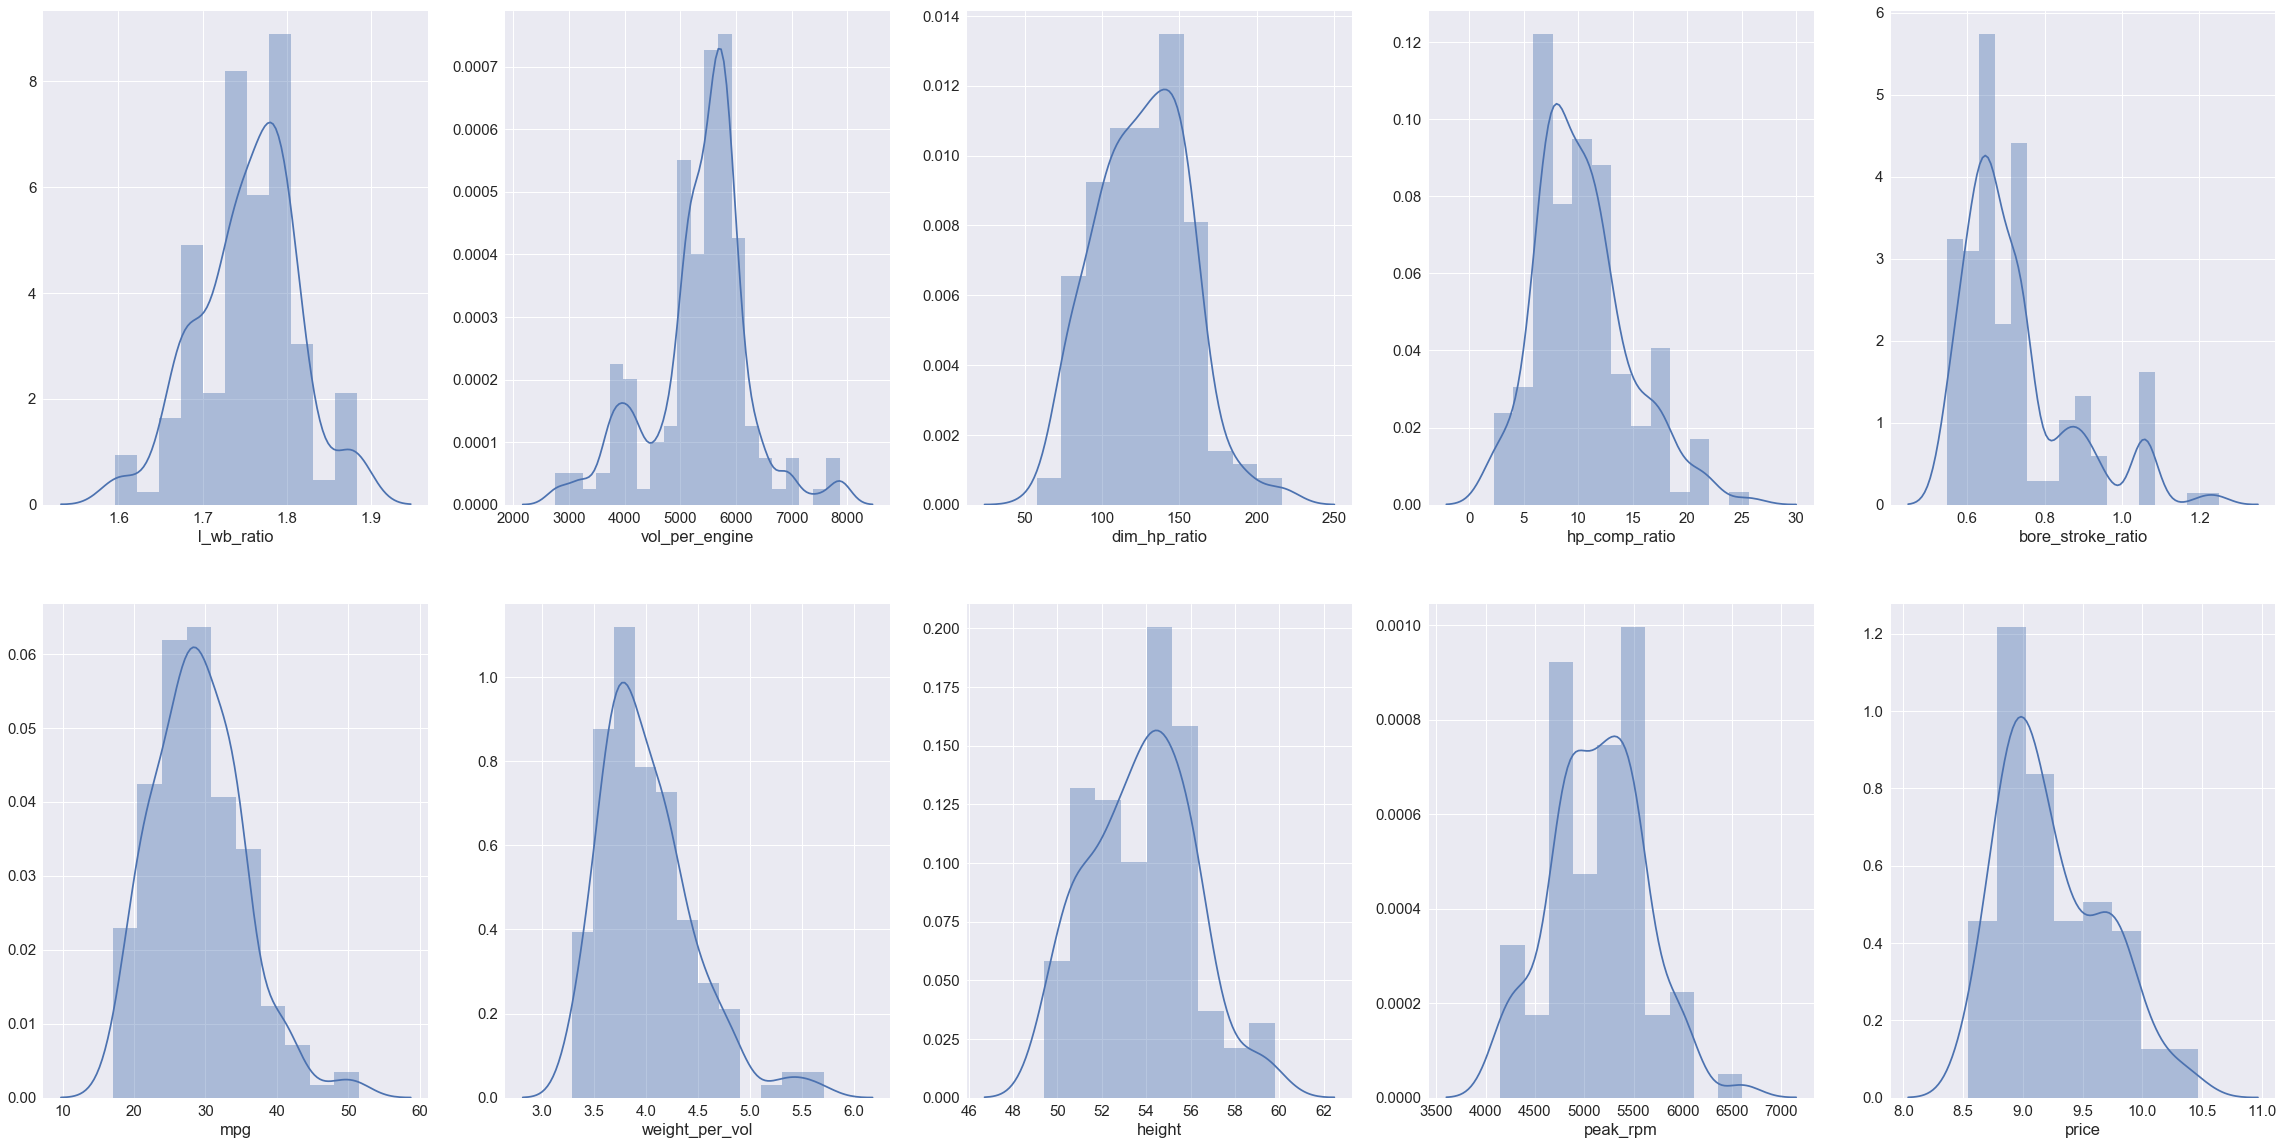

In [140]:
plt.clf()
with plt.style.context("seaborn-dark"):
    sns.set(font_scale=1.5)
    f, axes = plt.subplots(2, 5, figsize =(40, 20))
    for num, ax in zip(range(1,15), axes.flat):
        sns.distplot(a = data_3_b_log[data_3_b_log.columns[0+num]], ax = ax) 

In [141]:
data_3_b_lasso = Data_prep(data_3_b_log)
data_3_b_lasso.define_category(10)
data_3_b_lasso.scale()
estimator = Lasso(max_iter=100000)
param_range = [0.01, 0.1, 1.0, 10.0, 100.0]
param_grid = {'alpha': param_range}

data_3_b_lasso.grid_search(estimator = estimator, param_grid = param_grid, 
                         scoring = 'neg_mean_squared_error', cv = 10)
data_3_b_lasso.lr_show_performance()

[The Cross-Validation Best Score: Negative MSE & R2]
-501.34439011012427
[The Cross-Validation Best Hyper-Parameter]
{'alpha': 1.0}
[Test Score]
258.936298783
0.687381785616
[The spread BTW val & test]
242.408091327


#### The performance was not improved.

#### Recalling the Y(target) distribution was somewhat like Possion distribution, I will try log coverstion to Y. 

In [142]:
import math

In [143]:
data_3_b_lasso = Data_prep(data_3_b)
data_3_b_lasso.define_category(10)
data_3_b_lasso.scale()
estimator = Lasso(max_iter=100000)
param_range = [0.01, 0.1, 1.0, 10.0, 100.0]
param_grid = {'alpha': param_range}

data_3_b_lasso.y_train = data_3_b_lasso.y_train.apply(lambda x: np.log(x+1))
data_3_b_lasso.grid_search(estimator = estimator, param_grid = param_grid, 
                         scoring = 'neg_mean_squared_error', cv = 10)

In [144]:
data_3_b_lasso.grid_search.fit(data_3_b_lasso.X_train, data_3_b_lasso.y_train)
data_3_b_lasso.best_est = data_3_b_lasso.grid_search.best_estimator_.fit(data_3_b_lasso.X_train, data_3_b_lasso.y_train)
pred = pd.DataFrame(data_3_b_lasso.best_est.predict(data_3_b_lasso.X_test))
pred = pred.apply(lambda x: math.e**x)

In [145]:
print ("[The Cross-Validation Best Score: Negative MSE]")
print (data_3_b_lasso.grid_search.best_score_)
print ("[The Cross-Validation Best Hyper-Parameter]")
print (data_3_b_lasso.grid_search.best_params_)
print ("[Test Score]")
print (mean_squared_error(data_3_b_lasso.y_test, pred))
print (r2_score(data_3_b_lasso.y_test, pred))

[The Cross-Validation Best Score: Negative MSE]
-0.02878862523741987
[The Cross-Validation Best Hyper-Parameter]
{'alpha': 0.01}
[Test Score]
261.6288536
0.684131018215


#### Cross-Validation score is only low because the comparison was made in log unit.  The test score, however, has not been improved, either. 

#  Random Forest Regression for data_3_b

In [146]:
data_3_b_rf = Data_prep(data_3_b)
# Scaling can be skipeed for the tree model
estimator = RandomForestRegressor(random_state=1, n_jobs= -1)
n_est = [10, 100, 1000]
max_f = ['auto', 'sqrt', 'log2']
param_grid = {'n_estimators': n_est, 'max_features': max_f}

data_3_b_rf.grid_search(estimator = estimator, param_grid = param_grid, 
                         scoring = 'neg_mean_squared_error', cv = 10)

In [147]:
data_3_b_rf.rf_show_performance()

[The Cross-Validation Best Score: Negative MSE]
-430.40291140766635
[The Cross-Validation Best Hyper-Parameter]
{'max_features': 'auto', 'n_estimators': 1000}
[Test Score]
312.484015722
0.622732712726
[The spread BTW val & test]
117.918895686


#### The result is disappointing. Let's see how the model has selected the features.

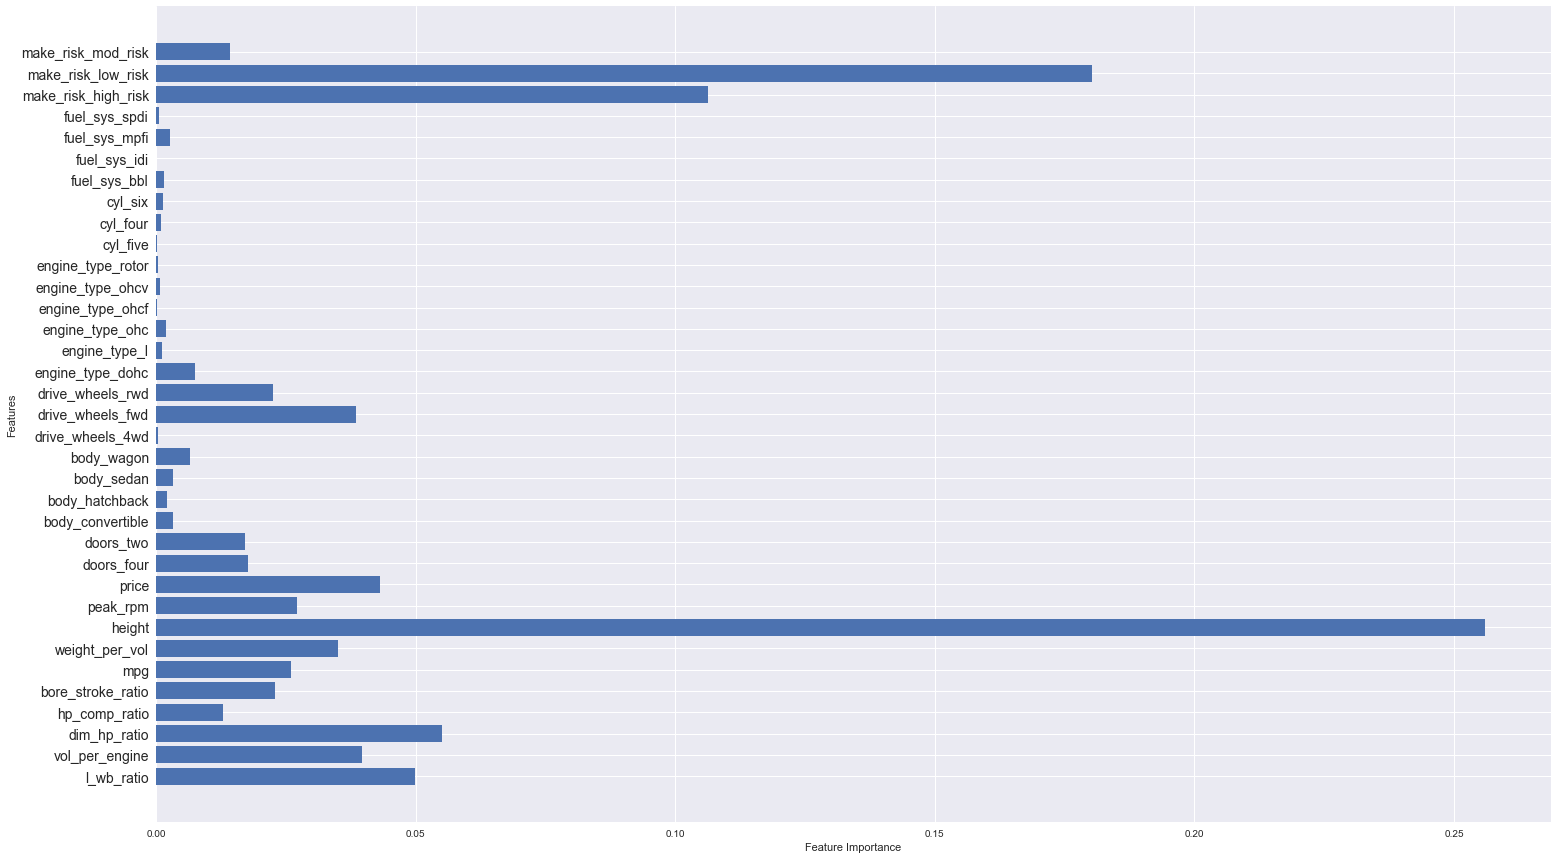

In [148]:
data_3_b_rf.rf_feature_importance()

#### Let's compare with data_3_a, which used 'modified category variable' but kept numerical variable as it was.

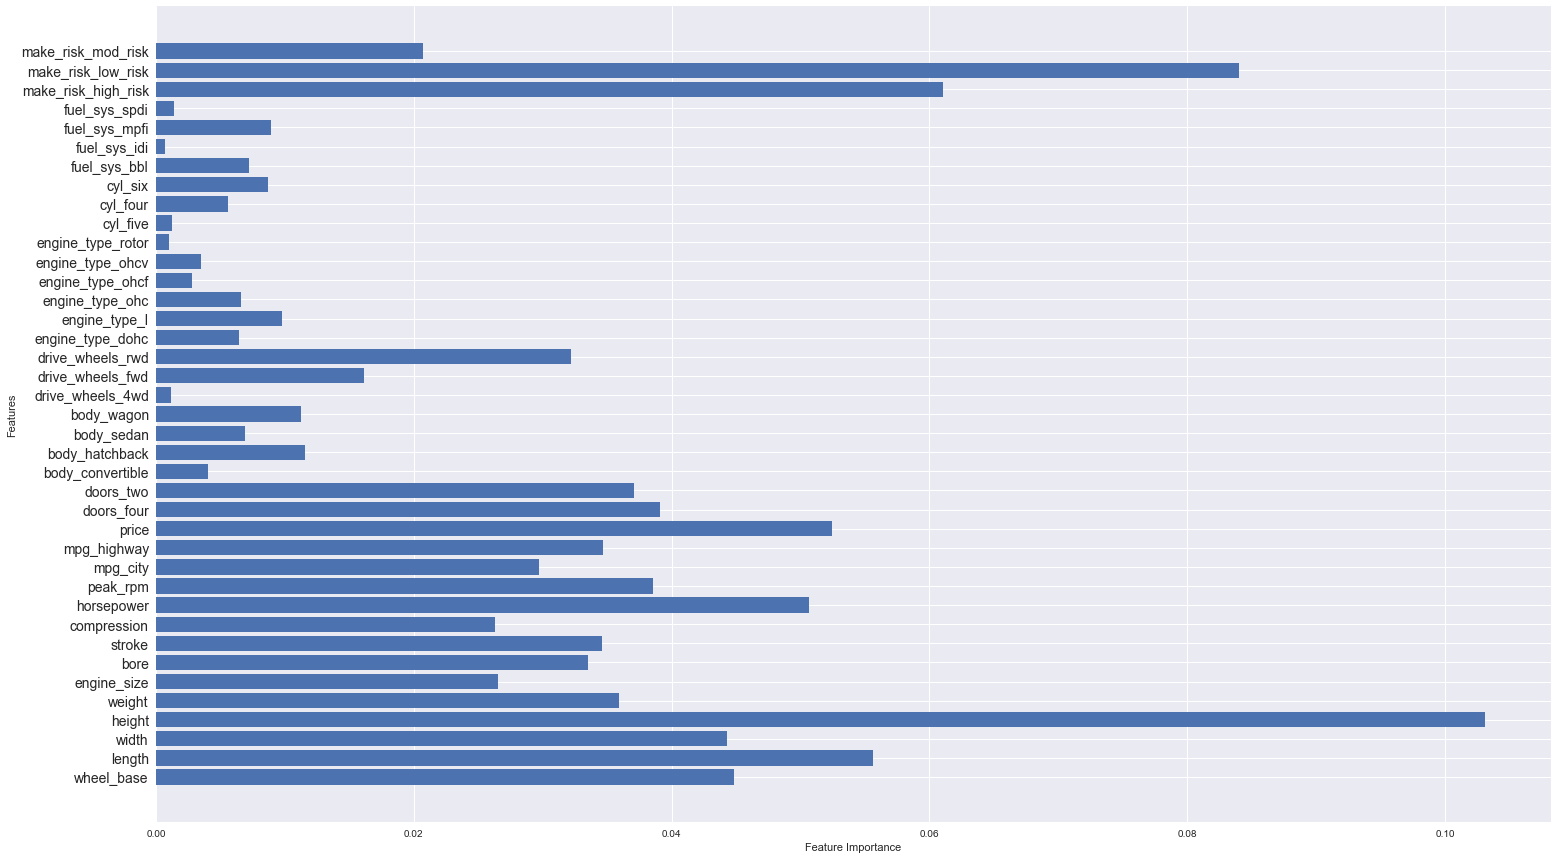

In [149]:
data_3_a_rf.rf_feature_importance()

#### The graph shows that the arithmetic conversion made quiet skewed distribution of feature importance.

#  PCA --> Lasso Regression for data_3_c

#### Here, I will use PCA instead of arithmetical conversion to reduce the number of dimension and multicolinearity.

In [150]:
data_3_c.columns

Index(['normal_loss', 'wheel_base', 'length', 'width', 'height', 'weight',
       'engine_size', 'bore', 'stroke', 'compression', 'horsepower',
       'peak_rpm', 'mpg_city', 'mpg_highway', 'price', 'doors_four',
       'doors_two', 'body_convertible', 'body_hatchback', 'body_sedan',
       'body_wagon', 'drive_wheels_4wd', 'drive_wheels_fwd',
       'drive_wheels_rwd', 'engine_type_dohc', 'engine_type_l',
       'engine_type_ohc', 'engine_type_ohcf', 'engine_type_ohcv',
       'engine_type_rotor', 'cyl_five', 'cyl_four', 'cyl_six', 'fuel_sys_bbl',
       'fuel_sys_idi', 'fuel_sys_mpfi', 'fuel_sys_spdi', 'make_risk_high_risk',
       'make_risk_low_risk', 'make_risk_mod_risk'],
      dtype='object')

In [151]:
data_3_c_lr = Data_prep(data_3_c)

#### Beause I have to find out the appropriate number of principle components, this needs few more codes.

In [152]:
scaler = RobustScaler()

data_3_c_lr.X_train_num = pd.DataFrame(scaler.fit_transform(data_3_c_lr.X_train.iloc[:, :14]), 
                                       columns = data_3_c_lr.X_train.columns[:14]) 
data_3_c_lr.X_train_num.reset_index(drop = True, inplace = True)
data_3_c_lr.X_train_cat = data_3_c_lr.X_train.iloc[:, 14:]
data_3_c_lr.X_train_cat.reset_index(drop = True, inplace = True)

data_3_c_lr.X_test_num = pd.DataFrame(scaler.transform(data_3_c_lr.X_test.iloc[:, :14]), 
                                       columns = data_3_c_lr.X_test.columns[:14]) 
data_3_c_lr.X_test_num.reset_index(drop = True, inplace = True)
data_3_c_lr.X_test_cat = data_3_c_lr.X_test.iloc[:, 14:]
data_3_c_lr.X_test_cat.reset_index(drop = True, inplace = True)


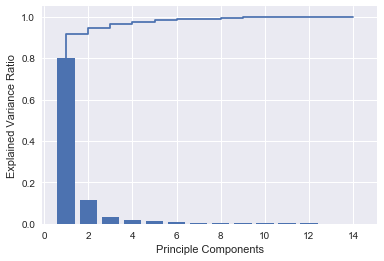

In [153]:
pca_nu = PCA(n_components=14)
pca_nu.fit(data_3_c_lr.X_train_num)
var = pca_nu.explained_variance_ratio_
plt.bar(range(1,15), var, align = 'center', label = 'individual explained variance')
plt.step(range(1,15), np.cumsum(var), label = 'cumulative explained variance')
plt.xlabel('Principle Components')
plt.ylabel('Explained Variance Ratio')

#### Nearly 90% of the variance is explained by two principle components.

In [154]:
pca_nu = PCA(n_components=2)
data_3_c_lr.X_train_num = pd.DataFrame(pca_nu.fit_transform(data_3_c_lr.X_train_num),columns = ['z1', 'z2'])
data_3_c_lr.X_train_num.reset_index(drop = True, inplace = True)
data_3_c_lr.X_train = pd.concat([data_3_c_lr.X_train_num, data_3_c_lr.X_train_cat], axis = 1, copy = False )

data_3_c_lr.X_test_num = pd.DataFrame(pca_nu.transform(data_3_c_lr.X_test_num), columns = ['z1', 'z2'])
data_3_c_lr.X_test_num.reset_index(drop = True, inplace = True)
data_3_c_lr.X_test = pd.concat([data_3_c_lr.X_test_num, data_3_c_lr.X_test_cat], axis = 1, copy = False )

In [155]:
estimator = Lasso(max_iter=100000)
param_range = [0.01, 0.1, 1.0, 10.0, 100.0]
param_grid = {'alpha': param_range}

data_3_c_lr.grid_search(estimator = estimator, param_grid = param_grid, 
                         scoring = 'neg_mean_squared_error', cv = 10)

In [156]:
data_3_c_lr.lr_show_performance()

[The Cross-Validation Best Score: Negative MSE & R2]
-564.9378383125397
[The Cross-Validation Best Hyper-Parameter]
{'alpha': 0.1}
[Test Score]
353.50479724
0.573207622845
[The spread BTW val & test]
211.433041073


#### The mean square error for both valiation and test has been increased. This would not be a good dataframe for linear regression.

#  PCA --> Random Forest Regression for data_3_c

In [157]:
data_3_c_rf = Data_prep(data_3_c)
scaler = RobustScaler()

data_3_c_rf.X_train_num = pd.DataFrame(scaler.fit_transform(data_3_c_rf.X_train.iloc[:, :14]), 
                                       columns = data_3_c_rf.X_train.columns[:14]) 
data_3_c_rf.X_train_num.reset_index(drop = True, inplace = True)
data_3_c_rf.X_train_cat = data_3_c_rf.X_train.iloc[:, 14:]
data_3_c_rf.X_train_cat.reset_index(drop = True, inplace = True)

data_3_c_rf.X_test_num = pd.DataFrame(scaler.transform(data_3_c_rf.X_test.iloc[:, :14]), 
                                       columns = data_3_c_rf.X_test.columns[:14]) 
data_3_c_rf.X_test_num.reset_index(drop = True, inplace = True)
data_3_c_rf.X_test_cat = data_3_c_rf.X_test.iloc[:, 14:]
data_3_c_rf.X_test_cat.reset_index(drop = True, inplace = True)

pca_nu = PCA(n_components=2)
data_3_c_rf.X_train_num = pd.DataFrame(pca_nu.fit_transform(data_3_c_rf.X_train_num),columns = ['z1', 'z2'])
data_3_c_rf.X_train_num.reset_index(drop = True, inplace = True)
data_3_c_rf.X_train = pd.concat([data_3_c_rf.X_train_num, data_3_c_rf.X_train_cat], axis = 1, copy = False )

data_3_c_rf.X_test_num = pd.DataFrame(pca_nu.transform(data_3_c_rf.X_test_num), columns = ['z1', 'z2'])
data_3_c_rf.X_test_num.reset_index(drop = True, inplace = True)
data_3_c_rf.X_test = pd.concat([data_3_c_rf.X_test_num, data_3_c_rf.X_test_cat], axis = 1, copy = False )

In [158]:
estimator = RandomForestRegressor(random_state=1, n_jobs= -1)
n_est = [10, 100, 1000]
max_f = ['auto', 'sqrt', 'log2']
param_grid = {'n_estimators': n_est, 'max_features': max_f}

data_3_c_rf.grid_search(estimator = estimator, param_grid = param_grid, 
                         scoring = 'neg_mean_squared_error', cv = 10)

In [159]:
data_3_c_rf.rf_show_performance()

[The Cross-Validation Best Score: Negative MSE]
-431.89114392089124
[The Cross-Validation Best Hyper-Parameter]
{'max_features': 'sqrt', 'n_estimators': 1000}
[Test Score]
324.307149471
0.608458441493
[The spread BTW val & test]
107.58399445


# Conclusion

#### The lowest 'validation' score was achieved by RandomForest model with data_3_a(original numerical values and modified categorical values); MSE: 397.33
#### At the same time, the lowest 'test' score was achieved by Linear Regression model with data_3_b(arithmetically converted numeric values and modified categorical values); MSE: 257.86
#### The spread between cross-valiation and test score is the lowest with RandomForest model.  Considering that we have small data set, I would recommend to choose the model with smaller gap.  